<a href="https://colab.research.google.com/github/wonbyongyoon/Quant_2025_03/blob/main/stockportfolio_20250308.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


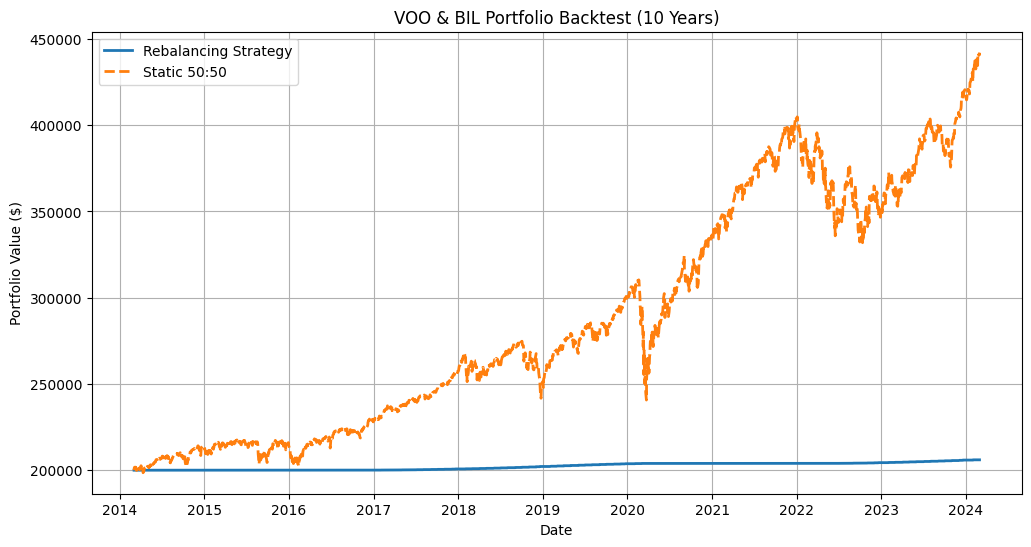

In [ ]:
# github test를 위한 수정

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 데이터 다운로드 (VOO & BIL) - 10년간 데이터
start_date = "2014-03-01"
end_date = "2024-03-01"

tickers = ["VOO", "BIL"]
data = yf.download(tickers, start=start_date, end=end_date, actions=True)

# 초기 투자 금액
initial_cash = 100000
voo_cash = initial_cash
bil_cash = initial_cash

# 최초 기준 VOO 가격
initial_voo_price = data["Close"]["VOO"].iloc[0]
peak_voo_price = initial_voo_price  # 최대 가격 기록

# 결과 저장 리스트
portfolio_values = []

for date, row in data.iterrows():
    voo_price = row["Close"]["VOO"]
    bil_price = row["Close"]["BIL"]  # BIL은 가격 변동이 적어 거의 1:1로 변동
    bil_dividend = row.get(("Dividends", "BIL"), 0)  # BIL 배당금 (없으면 0으로 처리)

    # 배당금 입금 (BIL 보유량 기준)
    bil_shares = bil_cash / bil_price
    bil_cash += bil_shares * bil_dividend

    # 포트폴리오 평가
    voo_shares = voo_cash / voo_price
    total_value = (voo_shares * voo_price) + (bil_shares * bil_price)
    portfolio_values.append((date, total_value))

    # VOO가 새로운 최고점인지 확인
    if voo_price > peak_voo_price:
        peak_voo_price = voo_price

    # VOO 가격이 최고점 대비 10% 하락하면 BIL을 10% 팔아서 VOO 매수
    elif voo_price <= 0.9 * peak_voo_price:
        rebalance_amount = bil_cash * 0.1  # BIL에서 10% 매도
        bil_cash -= rebalance_amount
        voo_cash += rebalance_amount  # VOO 추가 매수
        peak_voo_price = voo_price  # 새로운 기준 가격

# DataFrame으로 변환
portfolio_df = pd.DataFrame(portfolio_values, columns=["Date", "Portfolio Value"])
portfolio_df.set_index("Date", inplace=True)

# 단순 50:50 유지 포트폴리오 비교
initial_voo_shares = initial_cash / data["Close"]["VOO"].iloc[0]
initial_bil_shares = initial_cash / data["Close"]["BIL"].iloc[0]
portfolio_df["50:50 Portfolio"] = (initial_voo_shares * data["Close"]["VOO"]) + (initial_bil_shares * data["Close"]["BIL"])

# 성과 시각화
plt.figure(figsize=(12,6))
plt.plot(portfolio_df.index, portfolio_df["Portfolio Value"], label="Rebalancing Strategy", linewidth=2)
plt.plot(portfolio_df.index, portfolio_df["50:50 Portfolio"], label="Static 50:50", linestyle="--", linewidth=2)
plt.legend()
plt.title("VOO & BIL Portfolio Backtest (10 Years)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.grid()
plt.show()


[*********************100%***********************]  2 of 2 completed


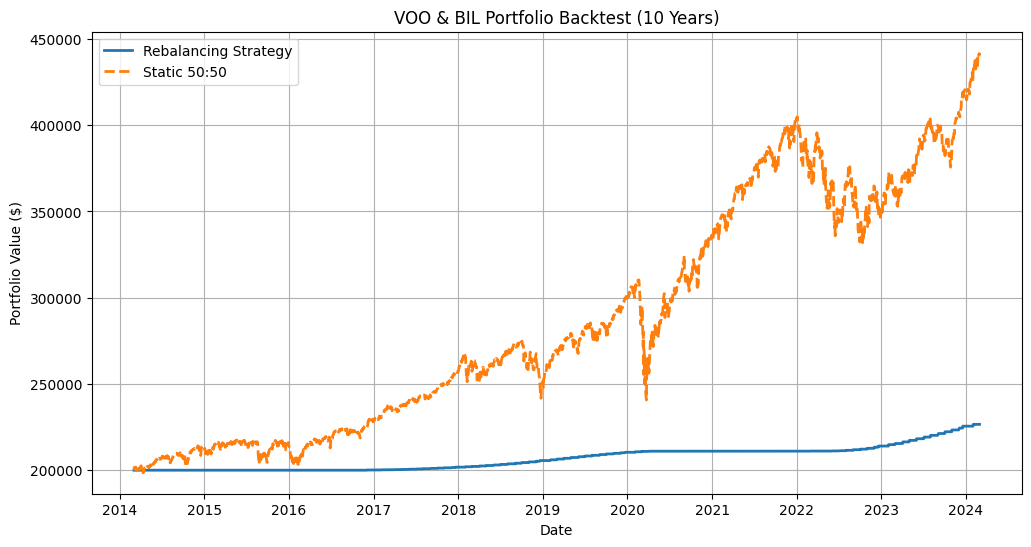

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 데이터 다운로드 (VOO & BIL) - 10년간 데이터
start_date = "2014-03-01"
end_date = "2024-03-01"

tickers = ["VOO", "BIL"]
data = yf.download(tickers, start=start_date, end=end_date, actions=True)

# 초기 투자 금액
initial_cash = 100000
voo_cash = initial_cash
bil_cash = initial_cash

# 최초 기준 VOO 가격
initial_voo_price = data["Close"]["VOO"].iloc[0]
peak_voo_price = initial_voo_price  # 최대 가격 기록

# 결과 저장 리스트
portfolio_values = []

for date, row in data.iterrows():
    voo_price = row["Close"]["VOO"]
    bil_price = row["Close"]["BIL"]  # BIL은 가격 변동이 적어 거의 1:1로 변동
    bil_dividend = row.get(("Dividends", "BIL"), 0)  # BIL 배당금 (없으면 0으로 처리)

    # 배당금 입금 (BIL 보유량 기준)
    bil_shares = bil_cash / bil_price
    bil_cash += bil_shares * bil_dividend

    # 포트폴리오 평가
    voo_shares = voo_cash / voo_price
    total_value = (voo_shares * voo_price) + (bil_shares * bil_price)
    portfolio_values.append((date, total_value))

    # VOO가 새로운 최고점인지 확인
    if voo_price > peak_voo_price:
        peak_voo_price = voo_price

        # 전고점 도달 시 일부 VOO 매도 후 BIL 매수
        rebalance_amount = voo_cash * 0.1
        voo_cash -= rebalance_amount
        bil_cash += rebalance_amount

    # VOO 가격이 최고점 대비 10% 하락하면 BIL을 10% 팔아서 VOO 매수
    elif voo_price <= 0.9 * peak_voo_price:
        rebalance_amount = bil_cash * 0.1  # BIL에서 10% 매도
        bil_cash -= rebalance_amount
        voo_cash += rebalance_amount  # VOO 추가 매수
        peak_voo_price = voo_price  # 새로운 기준 가격

# DataFrame으로 변환
portfolio_df = pd.DataFrame(portfolio_values, columns=["Date", "Portfolio Value"])
portfolio_df.set_index("Date", inplace=True)

# 단순 50:50 유지 포트폴리오 비교
initial_voo_shares = initial_cash / data["Close"]["VOO"].iloc[0]
initial_bil_shares = initial_cash / data["Close"]["BIL"].iloc[0]
portfolio_df["50:50 Portfolio"] = (initial_voo_shares * data["Close"]["VOO"]) + (initial_bil_shares * data["Close"]["BIL"])

# 성과 시각화
plt.figure(figsize=(12,6))
plt.plot(portfolio_df.index, portfolio_df["Portfolio Value"], label="Rebalancing Strategy", linewidth=2)
plt.plot(portfolio_df.index, portfolio_df["50:50 Portfolio"], label="Static 50:50", linestyle="--", linewidth=2)
plt.legend()
plt.title("VOO & BIL Portfolio Backtest (10 Years)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.grid()
plt.show()


[*********************100%***********************]  2 of 2 completed


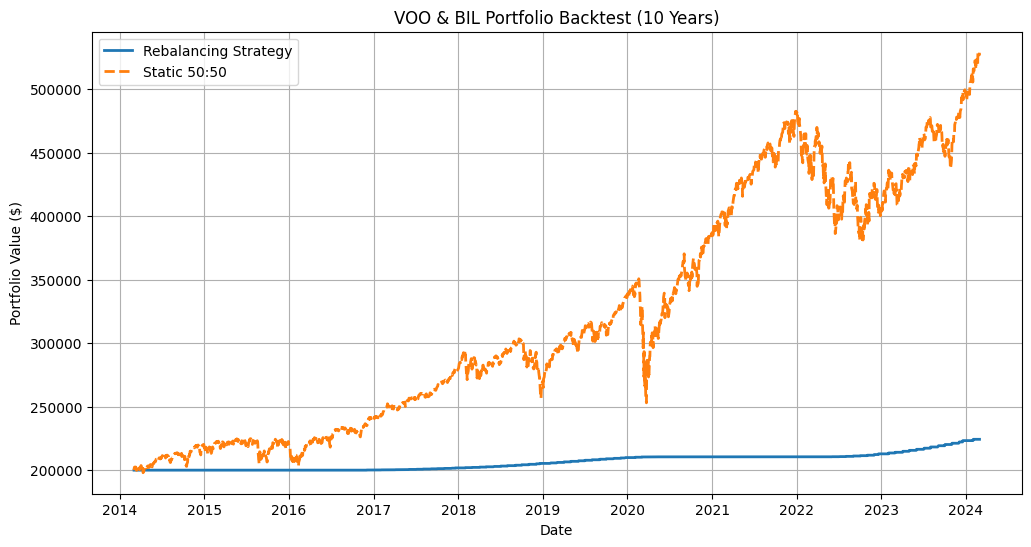

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 데이터 다운로드 (VOO & BIL) - 10년간 데이터
start_date = "2014-03-01"
end_date = "2024-03-01"

tickers = ["VOO", "BIL"]
data = yf.download(tickers, start=start_date, end=end_date, actions=True)

# 초기 투자 비율 조정 (VOO 70%, BIL 30%)
initial_voo_cash = 140000
initial_bil_cash = 60000
voo_cash = initial_voo_cash
bil_cash = initial_bil_cash

# 최초 기준 VOO 가격
initial_voo_price = data["Close"]["VOO"].iloc[0]
peak_voo_price = initial_voo_price  # 최대 가격 기록

# 결과 저장 리스트
portfolio_values = []

for date, row in data.iterrows():
    voo_price = row["Close"]["VOO"]
    bil_price = row["Close"]["BIL"]  # BIL은 가격 변동이 적어 거의 1:1로 변동
    bil_dividend = row.get(("Dividends", "BIL"), 0)  # BIL 배당금 (없으면 0으로 처리)

    # 배당금 입금 (BIL 보유량 기준)
    bil_shares = bil_cash / bil_price
    bil_cash += bil_shares * bil_dividend

    # 포트폴리오 평가
    voo_shares = voo_cash / voo_price
    total_value = (voo_shares * voo_price) + (bil_shares * bil_price)
    portfolio_values.append((date, total_value))

    # VOO가 새로운 최고점인지 확인
    if voo_price > peak_voo_price:
        peak_voo_price = voo_price

        # 전고점 도달 시 VOO 일부 매도 후 BIL 매수 (5%만 매도)
        rebalance_amount = voo_cash * 0.05
        voo_cash -= rebalance_amount
        bil_cash += rebalance_amount

    # VOO 가격이 최고점 대비 10% 하락하면 BIL을 20% 팔아서 VOO 매수
    elif voo_price <= 0.9 * peak_voo_price:
        rebalance_amount = bil_cash * 0.2  # BIL에서 20% 매도
        bil_cash -= rebalance_amount
        voo_cash += rebalance_amount  # VOO 추가 매수
        peak_voo_price = voo_price  # 새로운 기준 가격

# DataFrame으로 변환
portfolio_df = pd.DataFrame(portfolio_values, columns=["Date", "Portfolio Value"])
portfolio_df.set_index("Date", inplace=True)

# 단순 50:50 유지 포트폴리오 비교
initial_voo_shares = initial_voo_cash / data["Close"]["VOO"].iloc[0]
initial_bil_shares = initial_bil_cash / data["Close"]["BIL"].iloc[0]
portfolio_df["50:50 Portfolio"] = (initial_voo_shares * data["Close"]["VOO"]) + (initial_bil_shares * data["Close"]["BIL"])

# 성과 시각화
plt.figure(figsize=(12,6))
plt.plot(portfolio_df.index, portfolio_df["Portfolio Value"], label="Rebalancing Strategy", linewidth=2)
plt.plot(portfolio_df.index, portfolio_df["50:50 Portfolio"], label="Static 50:50", linestyle="--", linewidth=2)
plt.legend()
plt.title("VOO & BIL Portfolio Backtest (10 Years)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.grid()
plt.show()


[*********************100%***********************]  2 of 2 completed


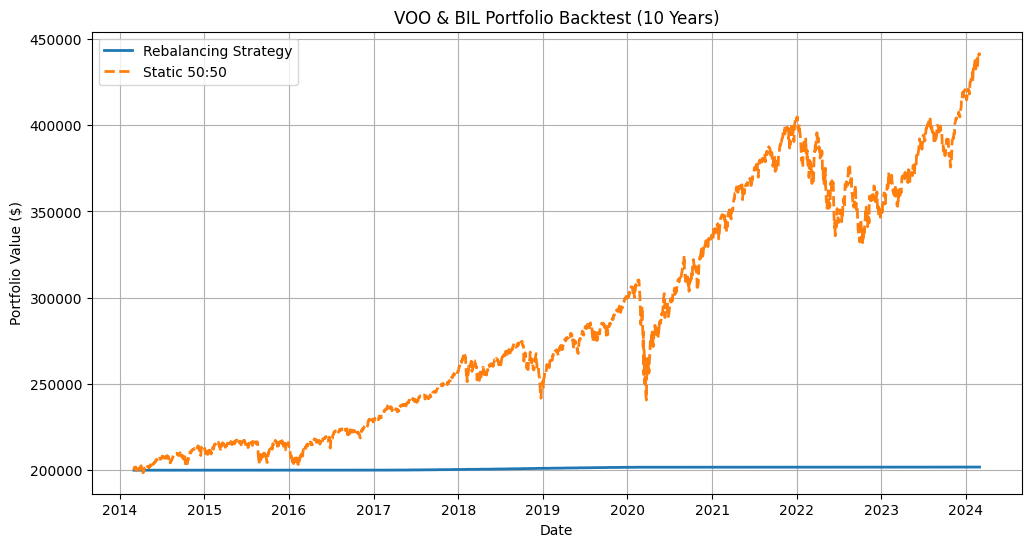

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 데이터 다운로드 (VOO & BIL) - 10년간 데이터
start_date = "2014-03-01"
end_date = "2024-03-01"

tickers = ["VOO", "BIL"]
data = yf.download(tickers, start=start_date, end=end_date, actions=True)

# 초기 투자 비율 조정 (VOO 50%, BIL 50%)
initial_voo_cash = 100000
initial_bil_cash = 100000
voo_cash = initial_voo_cash
bil_cash = initial_bil_cash

# 최초 기준 VOO 가격
initial_voo_price = data["Close"]["VOO"].iloc[0]
peak_voo_price = initial_voo_price  # 최대 가격 기록

# 결과 저장 리스트
portfolio_values = []

for date, row in data.iterrows():
    voo_price = row["Close"]["VOO"]
    bil_price = row["Close"]["BIL"]  # BIL은 가격 변동이 적어 거의 1:1로 변동
    bil_dividend = row.get(("Dividends", "BIL"), 0)  # BIL 배당금 (없으면 0으로 처리)

    # 배당금 입금 (BIL 보유량 기준)
    bil_shares = bil_cash / bil_price
    bil_cash += bil_shares * bil_dividend

    # 포트폴리오 평가
    voo_shares = voo_cash / voo_price
    total_value = (voo_shares * voo_price) + (bil_shares * bil_price)
    portfolio_values.append((date, total_value))

    # VOO가 새로운 최고점인지 확인
    if voo_price > peak_voo_price:
        peak_voo_price = voo_price  # 새로운 기준 가격으로 설정 (매도 전략 제거)

    # VOO 가격이 최고점 대비 10% 하락하면 BIL을 30% 팔아서 VOO 매수
    elif voo_price <= 0.9 * peak_voo_price:
        rebalance_amount = bil_cash * 0.3  # BIL에서 30% 매도
        bil_cash -= rebalance_amount
        voo_cash += rebalance_amount  # VOO 추가 매수
        peak_voo_price = voo_price  # 새로운 기준 가격

# DataFrame으로 변환
portfolio_df = pd.DataFrame(portfolio_values, columns=["Date", "Portfolio Value"])
portfolio_df.set_index("Date", inplace=True)

# 단순 50:50 유지 포트폴리오 비교
initial_voo_shares = initial_voo_cash / data["Close"]["VOO"].iloc[0]
initial_bil_shares = initial_bil_cash / data["Close"]["BIL"].iloc[0]
portfolio_df["50:50 Portfolio"] = (initial_voo_shares * data["Close"]["VOO"]) + (initial_bil_shares * data["Close"]["BIL"])

# 성과 시각화
plt.figure(figsize=(12,6))
plt.plot(portfolio_df.index, portfolio_df["Portfolio Value"], label="Rebalancing Strategy", linewidth=2)
plt.plot(portfolio_df.index, portfolio_df["50:50 Portfolio"], label="Static 50:50", linestyle="--", linewidth=2)
plt.legend()
plt.title("VOO & BIL Portfolio Backtest (10 Years)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.grid()
plt.show()


[*********************100%***********************]  2 of 2 completed


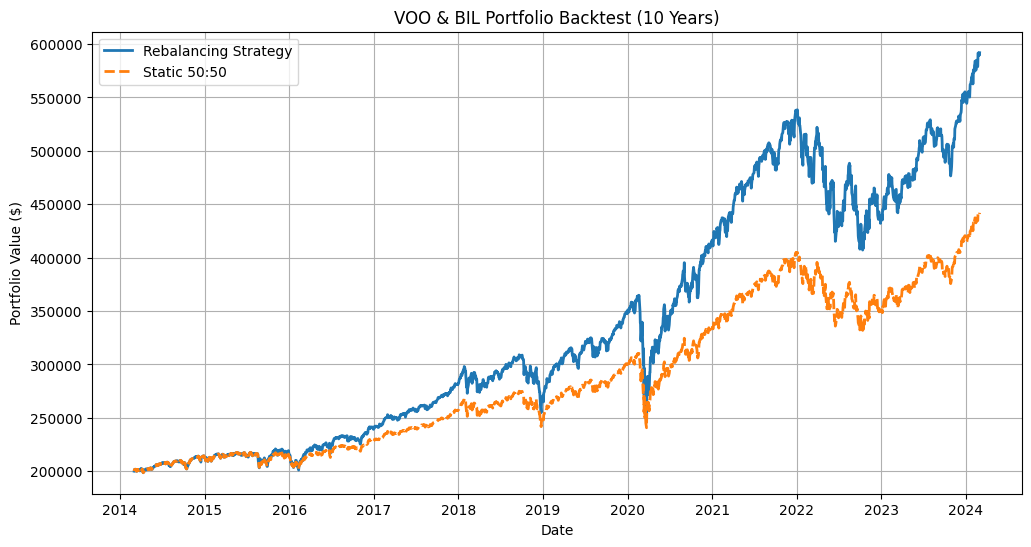

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 데이터 다운로드 (VOO & BIL) - 10년간 데이터
start_date = "2014-03-01"
end_date = "2024-03-01"

tickers = ["VOO", "BIL"]
data = yf.download(tickers, start=start_date, end=end_date, actions=True)

# 초기 투자 비율 조정 (VOO 50%, BIL 50%)
initial_voo_cash = 100000
initial_bil_cash = 100000

# 최초 주식 보유량
initial_voo_price = data["Close"]["VOO"].iloc[0]
initial_bil_price = data["Close"]["BIL"].iloc[0]
voo_shares = initial_voo_cash / initial_voo_price
bil_shares = initial_bil_cash / initial_bil_price

# 최초 기준 VOO 가격
peak_voo_price = initial_voo_price  # 최대 가격 기록

# 결과 저장 리스트
portfolio_values = []

for date, row in data.iterrows():
    voo_price = row["Close"]["VOO"]
    bil_price = row["Close"]["BIL"]  # BIL은 가격 변동이 적어 거의 1:1로 변동
    bil_dividend = row.get(("Dividends", "BIL"), 0)  # BIL 배당금 (없으면 0으로 처리)

    # 배당금 입금 (BIL 보유량 기준)
    bil_cash = bil_shares * bil_dividend

    # 포트폴리오 평가
    total_value = (voo_shares * voo_price) + (bil_shares * bil_price)
    portfolio_values.append((date, total_value))

    # VOO가 새로운 최고점인지 확인
    if voo_price > peak_voo_price:
        peak_voo_price = voo_price  # 새로운 기준 가격으로 설정 (매도 전략 제거)

    # VOO 가격이 최고점 대비 10% 하락하면 BIL을 30% 팔아서 VOO 매수
    elif voo_price <= 0.9 * peak_voo_price:
        rebalance_amount = bil_shares * 0.3  # BIL에서 30% 매도
        bil_shares -= rebalance_amount
        voo_shares += (rebalance_amount * bil_price) / voo_price  # VOO 추가 매수
        peak_voo_price = voo_price  # 새로운 기준 가격

# DataFrame으로 변환
portfolio_df = pd.DataFrame(portfolio_values, columns=["Date", "Portfolio Value"])
portfolio_df.set_index("Date", inplace=True)

# 단순 50:50 유지 포트폴리오 비교
initial_voo_shares = initial_voo_cash / data["Close"]["VOO"].iloc[0]
initial_bil_shares = initial_bil_cash / data["Close"]["BIL"].iloc[0]
portfolio_df["50:50 Portfolio"] = (initial_voo_shares * data["Close"]["VOO"]) + (initial_bil_shares * data["Close"]["BIL"])

# 성과 시각화
plt.figure(figsize=(12,6))
plt.plot(portfolio_df.index, portfolio_df["Portfolio Value"], label="Rebalancing Strategy", linewidth=2)
plt.plot(portfolio_df.index, portfolio_df["50:50 Portfolio"], label="Static 50:50", linestyle="--", linewidth=2)
plt.legend()
plt.title("VOO & BIL Portfolio Backtest (10 Years)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.grid()
plt.show()


[*********************100%***********************]  2 of 2 completed


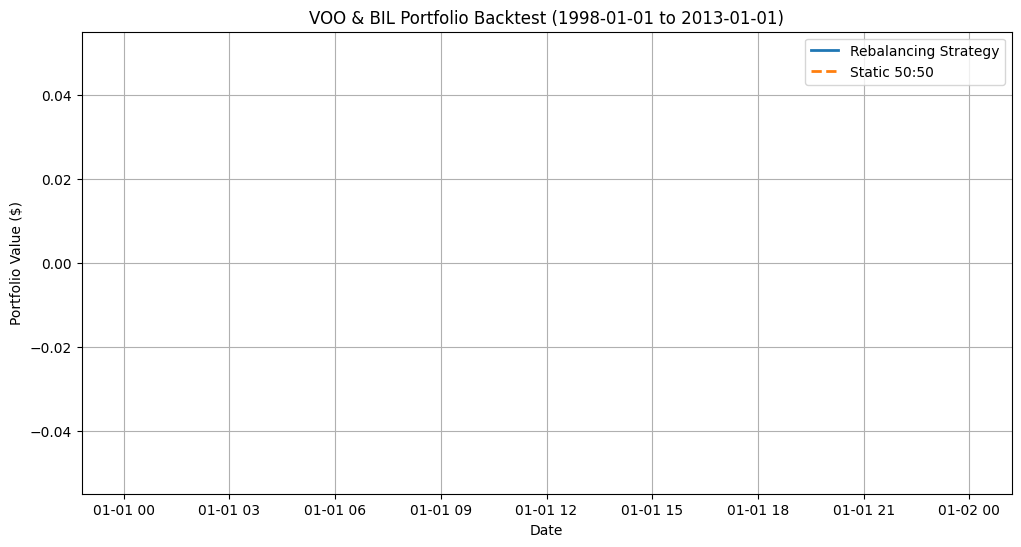

[*********************100%***********************]  2 of 2 completed


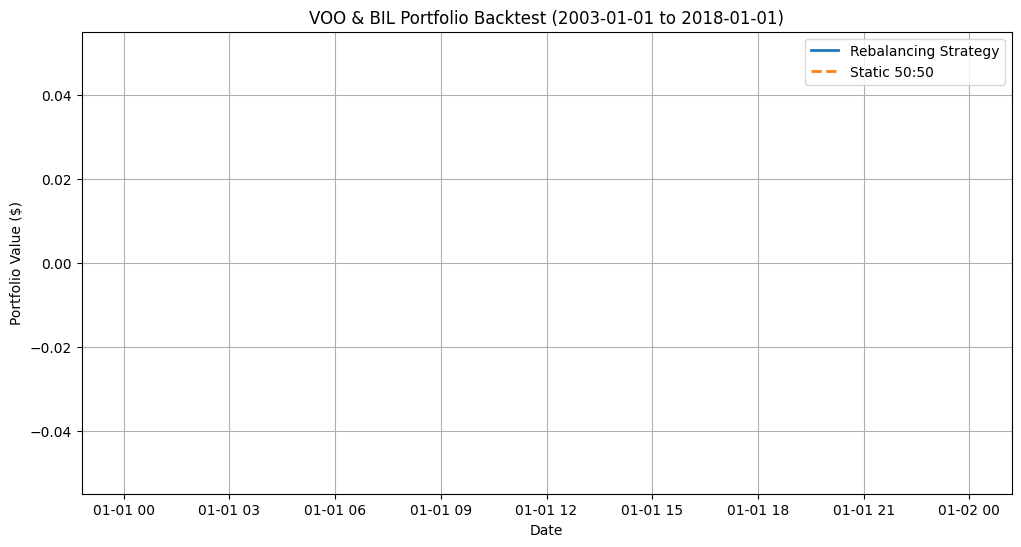

[*********************100%***********************]  2 of 2 completed


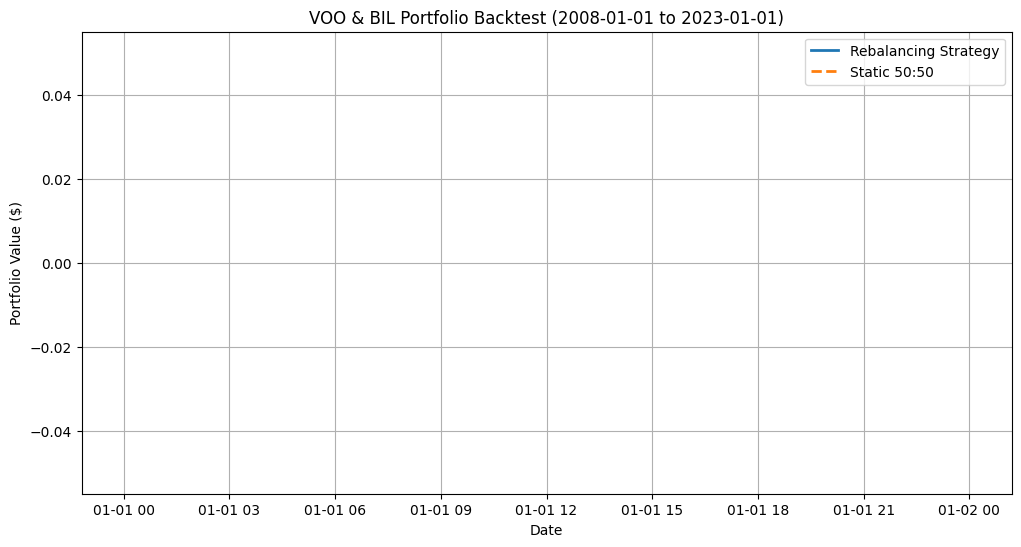

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 백테스트 기간 설정 (1998년부터 15년씩 분할)
time_periods = [("1998-01-01", "2013-01-01"), ("2003-01-01", "2018-01-01"), ("2008-01-01", "2023-01-01")]

tickers = ["VOO", "BIL"]

for start_date, end_date in time_periods:
    # 데이터 다운로드
    data = yf.download(tickers, start=start_date, end=end_date, actions=True)

    # 초기 투자 비율 조정 (VOO 50%, BIL 50%)
    initial_voo_cash = 100000
    initial_bil_cash = 100000

    # 최초 주식 보유량
    initial_voo_price = data["Close"]["VOO"].iloc[0]
    initial_bil_price = data["Close"]["BIL"].iloc[0]
    voo_shares = initial_voo_cash / initial_voo_price
    bil_shares = initial_bil_cash / initial_bil_price

    # 최초 기준 VOO 가격
    peak_voo_price = initial_voo_price  # 최대 가격 기록

    # 결과 저장 리스트
    portfolio_values = []

    for date, row in data.iterrows():
        voo_price = row["Close"]["VOO"]
        bil_price = row["Close"]["BIL"]  # BIL은 가격 변동이 적어 거의 1:1로 변동
        bil_dividend = row.get(("Dividends", "BIL"), 0)  # BIL 배당금 (없으면 0으로 처리)

        # 배당금 입금 (BIL 보유량 기준)
        bil_cash = bil_shares * bil_dividend

        # 포트폴리오 평가
        total_value = (voo_shares * voo_price) + (bil_shares * bil_price)
        portfolio_values.append((date, total_value))

        # VOO가 새로운 최고점인지 확인
        if voo_price > peak_voo_price:
            peak_voo_price = voo_price  # 새로운 기준 가격으로 설정 (매도 전략 제거)

        # VOO 가격이 최고점 대비 10% 하락하면 BIL을 30% 팔아서 VOO 매수
        elif voo_price <= 0.9 * peak_voo_price:
            rebalance_amount = bil_shares * 0.3  # BIL에서 30% 매도
            bil_shares -= rebalance_amount
            voo_shares += (rebalance_amount * bil_price) / voo_price  # VOO 추가 매수
            peak_voo_price = voo_price  # 새로운 기준 가격

    # DataFrame으로 변환
    portfolio_df = pd.DataFrame(portfolio_values, columns=["Date", "Portfolio Value"])
    portfolio_df.set_index("Date", inplace=True)

    # 단순 50:50 유지 포트폴리오 비교
    initial_voo_shares = initial_voo_cash / data["Close"]["VOO"].iloc[0]
    initial_bil_shares = initial_bil_cash / data["Close"]["BIL"].iloc[0]
    portfolio_df["50:50 Portfolio"] = (initial_voo_shares * data["Close"]["VOO"]) + (initial_bil_shares * data["Close"]["BIL"])

    # 성과 시각화
    plt.figure(figsize=(12,6))
    plt.plot(portfolio_df.index, portfolio_df["Portfolio Value"], label="Rebalancing Strategy", linewidth=2)
    plt.plot(portfolio_df.index, portfolio_df["50:50 Portfolio"], label="Static 50:50", linestyle="--", linewidth=2)
    plt.legend()
    plt.title(f"VOO & BIL Portfolio Backtest ({start_date} to {end_date})")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value ($)")
    plt.grid()
    plt.show()


[*********************100%***********************]  2 of 2 completed


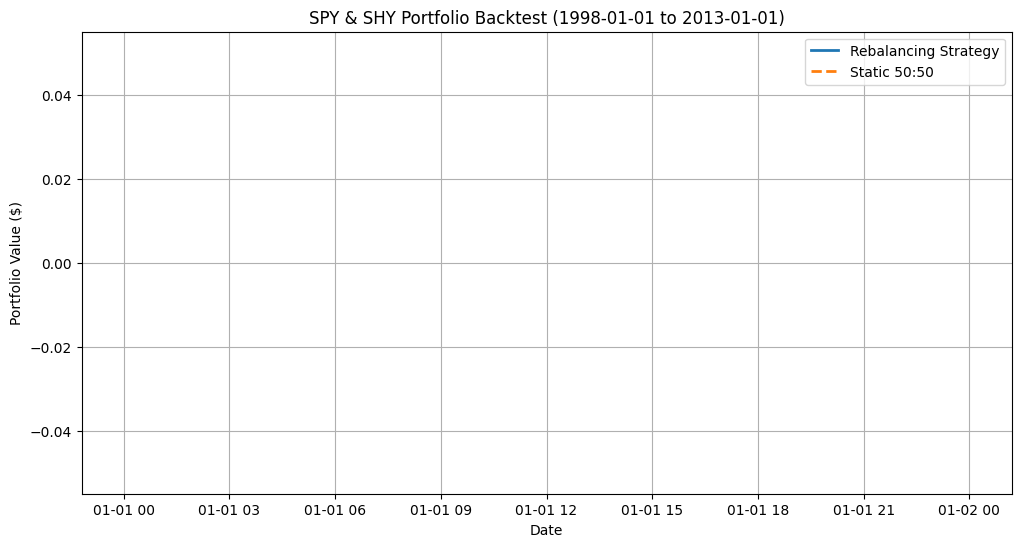

[*********************100%***********************]  2 of 2 completed


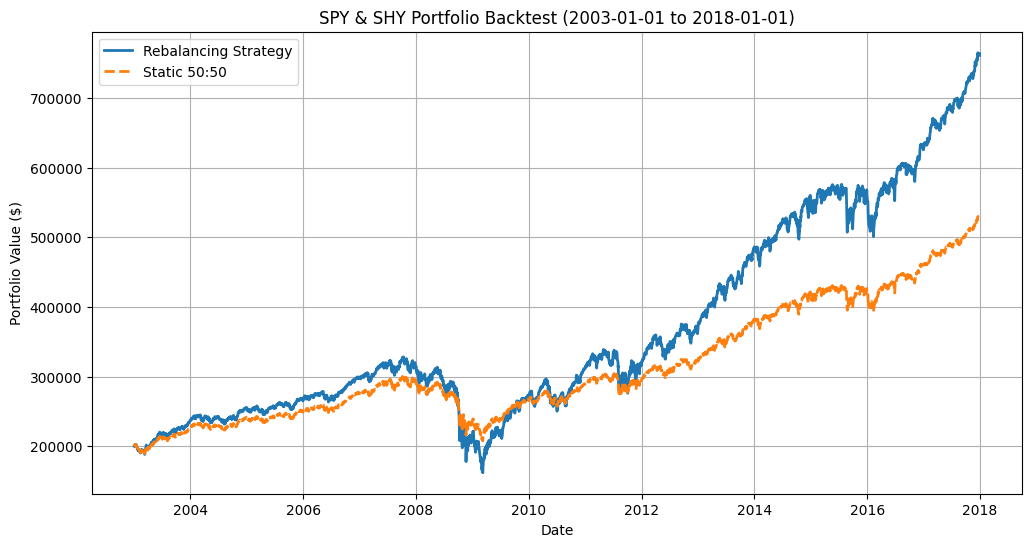

[*********************100%***********************]  2 of 2 completed


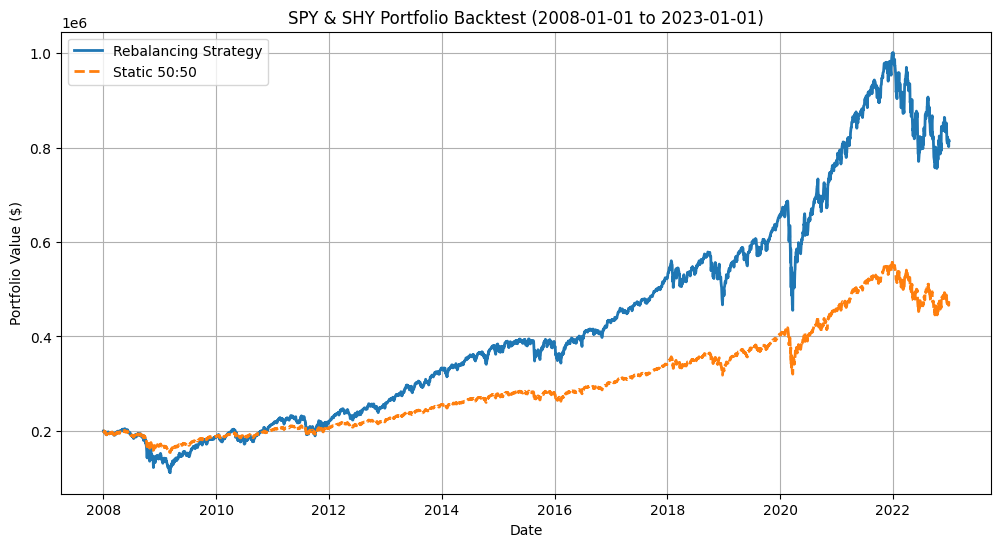

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 백테스트 기간 설정 (1998년부터 15년씩 분할)
time_periods = [("1998-01-01", "2013-01-01"), ("2003-01-01", "2018-01-01"), ("2008-01-01", "2023-01-01")]

tickers = ["SPY", "SHY"]  # VOO 대신 SPY 사용, BIL 대신 SHY 사용

for start_date, end_date in time_periods:
    # 데이터 다운로드
    data = yf.download(tickers, start=start_date, end=end_date, actions=True)
    if data.empty:
        print(f"No data available for the period {start_date} to {end_date}")
        continue

    # 초기 투자 비율 조정 (SPY 50%, SHY 50%)
    initial_spy_cash = 100000
    initial_shy_cash = 100000

    # 최초 주식 보유량
    initial_spy_price = data["Close"]["SPY"].iloc[0]
    initial_shy_price = data["Close"]["SHY"].iloc[0]
    spy_shares = initial_spy_cash / initial_spy_price
    shy_shares = initial_shy_cash / initial_shy_price

    # 최초 기준 SPY 가격
    peak_spy_price = initial_spy_price  # 최대 가격 기록

    # 결과 저장 리스트
    portfolio_values = []

    for date, row in data.iterrows():
        spy_price = row["Close"]["SPY"]
        shy_price = row["Close"]["SHY"]  # SHY는 단기 국채 ETF
        shy_dividend = row.get(("Dividends", "SHY"), 0)  # SHY 배당금 (없으면 0으로 처리)

        # 배당금 입금 (SHY 보유량 기준)
        shy_cash = shy_shares * shy_dividend

        # 포트폴리오 평가
        total_value = (spy_shares * spy_price) + (shy_shares * shy_price)
        portfolio_values.append((date, total_value))

        # SPY가 새로운 최고점인지 확인
        if spy_price > peak_spy_price:
            peak_spy_price = spy_price  # 새로운 기준 가격으로 설정 (매도 전략 제거)

        # SPY 가격이 최고점 대비 10% 하락하면 SHY를 30% 팔아서 SPY 매수
        elif spy_price <= 0.9 * peak_spy_price:
            rebalance_amount = shy_shares * 0.3  # SHY에서 30% 매도
            shy_shares -= rebalance_amount
            spy_shares += (rebalance_amount * shy_price) / spy_price  # SPY 추가 매수
            peak_spy_price = spy_price  # 새로운 기준 가격

    # DataFrame으로 변환
    portfolio_df = pd.DataFrame(portfolio_values, columns=["Date", "Portfolio Value"])
    portfolio_df.set_index("Date", inplace=True)

    # 단순 50:50 유지 포트폴리오 비교
    initial_spy_shares = initial_spy_cash / data["Close"]["SPY"].iloc[0]
    initial_shy_shares = initial_shy_cash / data["Close"]["SHY"].iloc[0]
    portfolio_df["50:50 Portfolio"] = (initial_spy_shares * data["Close"]["SPY"]) + (initial_shy_shares * data["Close"]["SHY"])

    # 성과 시각화
    plt.figure(figsize=(12,6))
    plt.plot(portfolio_df.index, portfolio_df["Portfolio Value"], label="Rebalancing Strategy", linewidth=2)
    plt.plot(portfolio_df.index, portfolio_df["50:50 Portfolio"], label="Static 50:50", linestyle="--", linewidth=2)
    plt.legend()
    plt.title(f"SPY & SHY Portfolio Backtest ({start_date} to {end_date})")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value ($)")
    plt.grid()
    plt.show()


[*********************100%***********************]  3 of 3 completed


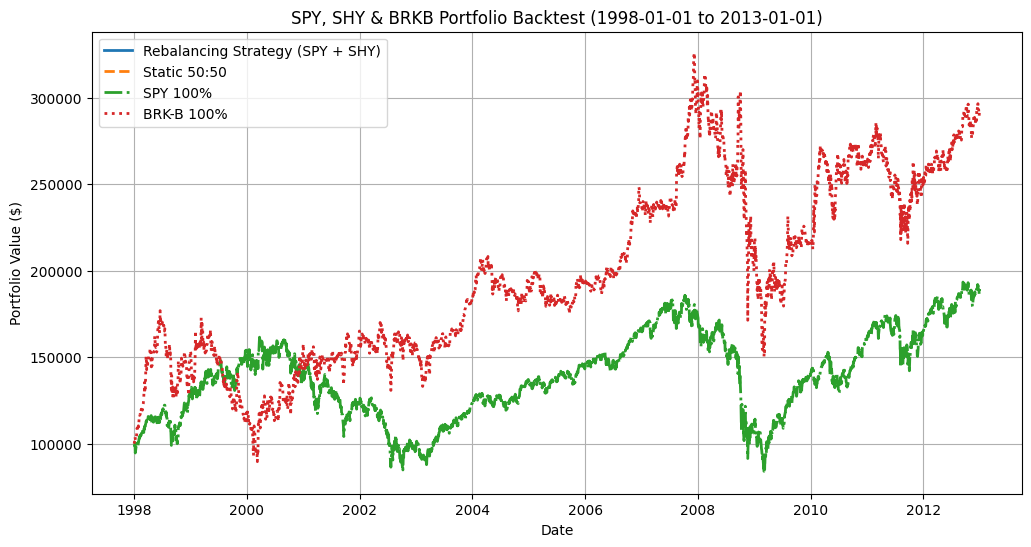

[*********************100%***********************]  3 of 3 completed


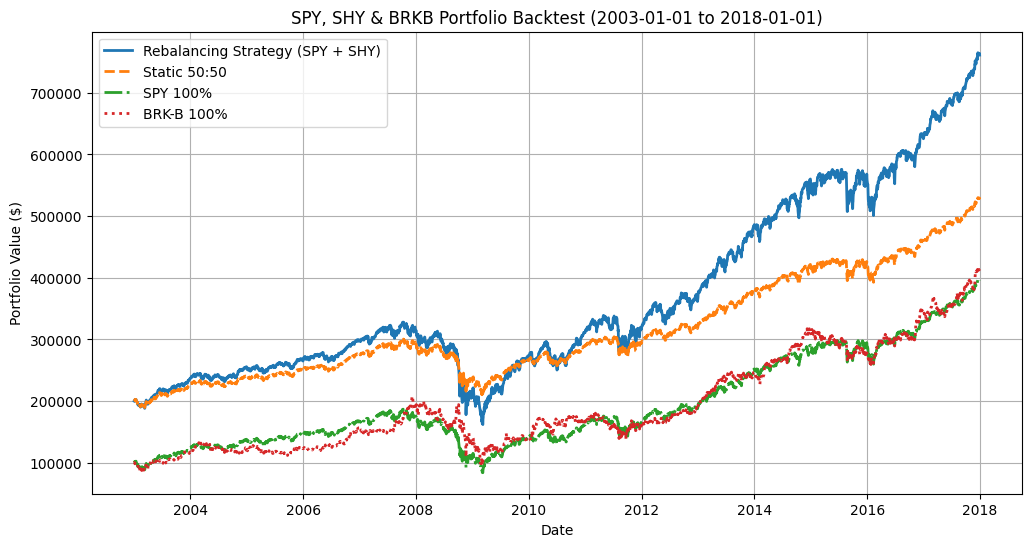

[*********************100%***********************]  3 of 3 completed


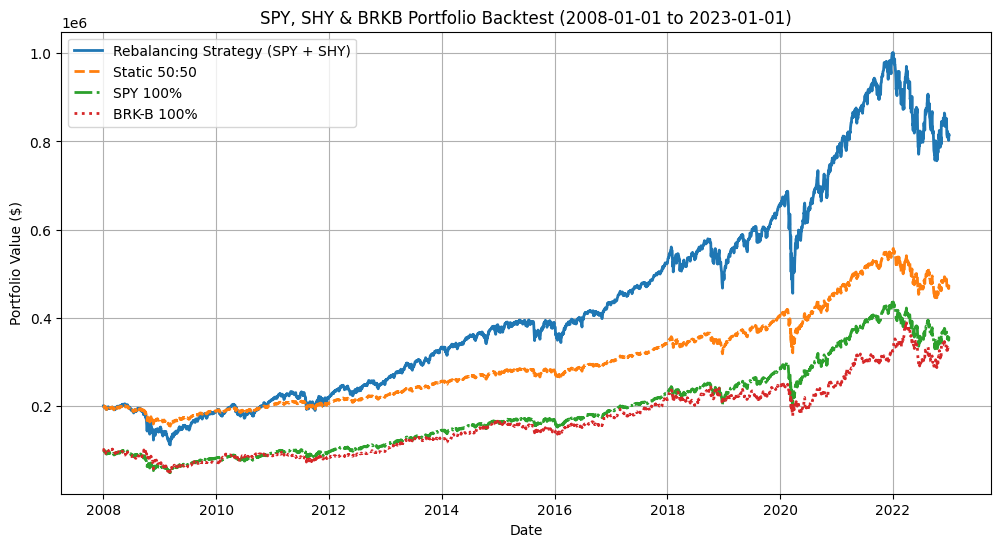

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 백테스트 기간 설정 (1998년부터 15년씩 분할)
time_periods = [("1998-01-01", "2013-01-01"), ("2003-01-01", "2018-01-01"), ("2008-01-01", "2023-01-01")]

tickers = ["SPY", "SHY", "BRK-B"]  # VOO 대신 SPY 사용, BIL 대신 SHY 사용, BRK-B 추가

for start_date, end_date in time_periods:
    # 데이터 다운로드
    data = yf.download(tickers, start=start_date, end=end_date, actions=True)
    if data.empty:
        print(f"No data available for the period {start_date} to {end_date}")
        continue

    # 초기 투자 비율 조정 (SPY 50%, SHY 50%)
    initial_spy_cash = 100000
    initial_shy_cash = 100000
    initial_brkb_cash = 100000

    # 최초 주식 보유량
    initial_spy_price = data["Close"]["SPY"].iloc[0]
    initial_shy_price = data["Close"]["SHY"].iloc[0]
    initial_brkb_price = data["Close"]["BRK-B"].iloc[0]

    spy_shares = initial_spy_cash / initial_spy_price
    shy_shares = initial_shy_cash / initial_shy_price
    brkb_shares = initial_brkb_cash / initial_brkb_price  # BRK-B 100% 전략 추가

    # 최초 기준 SPY 가격
    peak_spy_price = initial_spy_price  # 최대 가격 기록

    # 결과 저장 리스트
    portfolio_values = []

    for date, row in data.iterrows():
        spy_price = row["Close"]["SPY"]
        shy_price = row["Close"]["SHY"]  # SHY는 단기 국채 ETF
        brkb_price = row["Close"]["BRK-B"]
        shy_dividend = row.get(("Dividends", "SHY"), 0)  # SHY 배당금 (없으면 0으로 처리)

        # 배당금 입금 (SHY 보유량 기준)
        shy_cash = shy_shares * shy_dividend

        # 포트폴리오 평가
        total_value = (spy_shares * spy_price) + (shy_shares * shy_price)
        brkb_value = brkb_shares * brkb_price  # BRK-B 100% 포트폴리오 평가

        portfolio_values.append((date, total_value, brkb_value))

        # SPY가 새로운 최고점인지 확인
        if spy_price > peak_spy_price:
            peak_spy_price = spy_price  # 새로운 기준 가격으로 설정 (매도 전략 제거)

        # SPY 가격이 최고점 대비 10% 하락하면 SHY를 30% 팔아서 SPY 매수
        elif spy_price <= 0.9 * peak_spy_price:
            rebalance_amount = shy_shares * 0.3  # SHY에서 30% 매도
            shy_shares -= rebalance_amount
            spy_shares += (rebalance_amount * shy_price) / spy_price  # SPY 추가 매수
            peak_spy_price = spy_price  # 새로운 기준 가격

    # DataFrame으로 변환
    portfolio_df = pd.DataFrame(portfolio_values, columns=["Date", "Portfolio Value", "BRKB Portfolio Value"])
    portfolio_df.set_index("Date", inplace=True)

    # 단순 50:50 유지 포트폴리오 비교
    initial_spy_shares = initial_spy_cash / data["Close"]["SPY"].iloc[0]
    initial_shy_shares = initial_shy_cash / data["Close"]["SHY"].iloc[0]
    initial_brkb_shares = initial_brkb_cash / data["Close"]["BRK-B"].iloc[0]

    portfolio_df["50:50 Portfolio"] = (initial_spy_shares * data["Close"]["SPY"]) + (initial_shy_shares * data["Close"]["SHY"])
    portfolio_df["SPY 100% Portfolio"] = initial_spy_shares * data["Close"]["SPY"]
    portfolio_df["BRKB 100% Portfolio"] = initial_brkb_shares * data["Close"]["BRK-B"]

    # 성과 시각화
    plt.figure(figsize=(12,6))
    plt.plot(portfolio_df.index, portfolio_df["Portfolio Value"], label="Rebalancing Strategy (SPY + SHY)", linewidth=2)
    plt.plot(portfolio_df.index, portfolio_df["50:50 Portfolio"], label="Static 50:50", linestyle="--", linewidth=2)
    plt.plot(portfolio_df.index, portfolio_df["SPY 100% Portfolio"], label="SPY 100%", linestyle="-.", linewidth=2)
    plt.plot(portfolio_df.index, portfolio_df["BRKB 100% Portfolio"], label="BRK-B 100%", linestyle=":", linewidth=2)
    plt.legend()
    plt.title(f"SPY, SHY & BRKB Portfolio Backtest ({start_date} to {end_date})")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value ($)")
    plt.grid()
    plt.show()

[*********************100%***********************]  3 of 3 completed


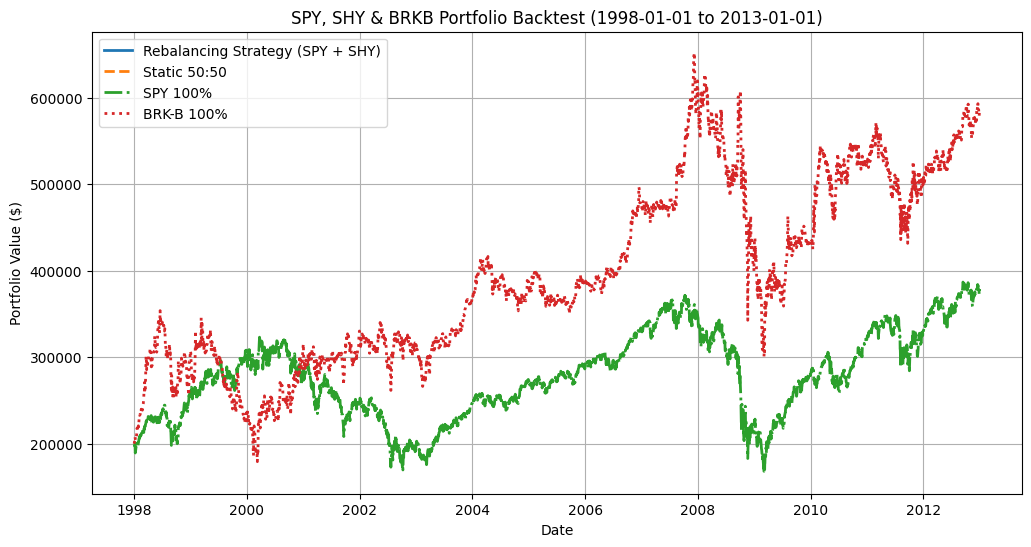

[*********************100%***********************]  3 of 3 completed


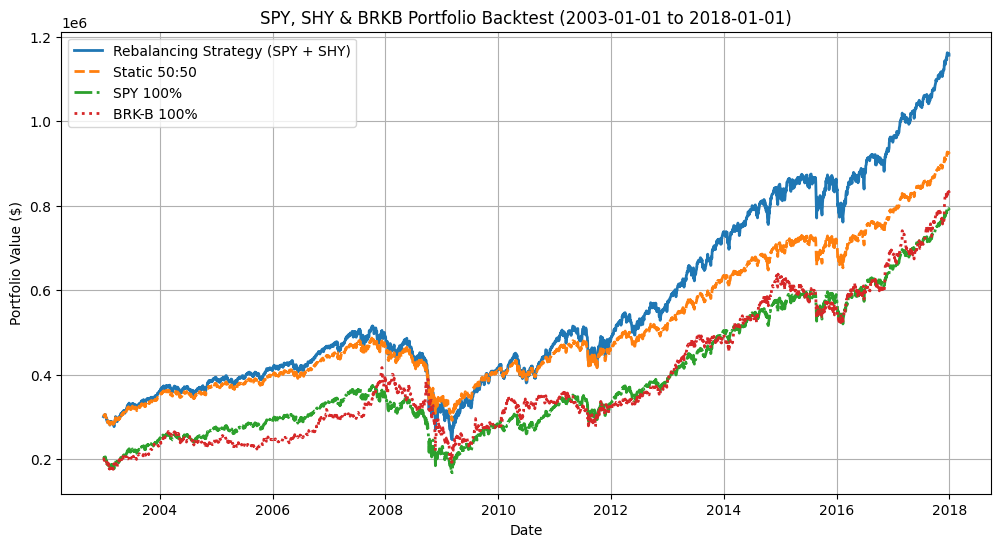

[*********************100%***********************]  3 of 3 completed


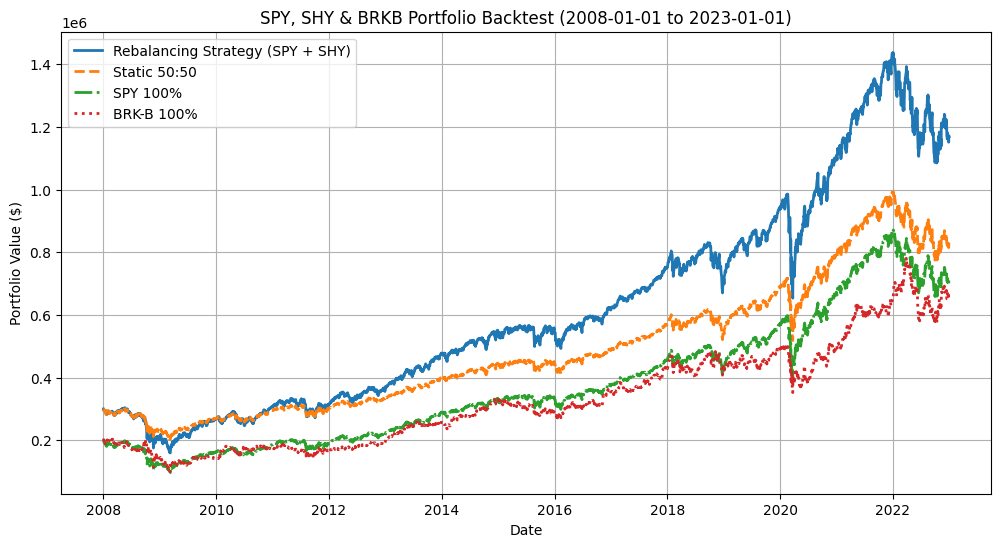

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 백테스트 기간 설정 (1998년부터 15년씩 분할)
time_periods = [("1998-01-01", "2013-01-01"), ("2003-01-01", "2018-01-01"), ("2008-01-01", "2023-01-01")]

tickers = ["SPY", "SHY", "BRK-B"]  # VOO 대신 SPY 사용, BIL 대신 SHY 사용, BRK-B 추가

for start_date, end_date in time_periods:
    # 데이터 다운로드
    data = yf.download(tickers, start=start_date, end=end_date, actions=True)
    if data.empty:
        print(f"No data available for the period {start_date} to {end_date}")
        continue

    # 초기 투자 비율 조정 (SPY 50%, SHY 50%)
    initial_cash = 200000  # 모든 포트폴리오의 초기 투자금 동일하게 설정
    initial_spy_cash = initial_cash
    initial_shy_cash = initial_cash / 2  # 리밸런싱 전략용
    initial_brkb_cash = initial_cash

    # 최초 주식 보유량
    initial_spy_price = data["Close"]["SPY"].iloc[0]
    initial_shy_price = data["Close"]["SHY"].iloc[0]
    initial_brkb_price = data["Close"]["BRK-B"].iloc[0]

    spy_shares = initial_spy_cash / initial_spy_price
    shy_shares = initial_shy_cash / initial_shy_price
    brkb_shares = initial_brkb_cash / initial_brkb_price  # BRK-B 100% 전략 추가

    # 최초 기준 SPY 가격
    peak_spy_price = initial_spy_price  # 최대 가격 기록

    # 결과 저장 리스트
    portfolio_values = []

    for date, row in data.iterrows():
        spy_price = row["Close"]["SPY"]
        shy_price = row["Close"]["SHY"]  # SHY는 단기 국채 ETF
        brkb_price = row["Close"]["BRK-B"]
        shy_dividend = row.get(("Dividends", "SHY"), 0)  # SHY 배당금 (없으면 0으로 처리)

        # 배당금 입금 (SHY 보유량 기준)
        shy_cash = shy_shares * shy_dividend

        # 포트폴리오 평가
        total_value = (spy_shares * spy_price) + (shy_shares * shy_price)
        brkb_value = brkb_shares * brkb_price  # BRK-B 100% 포트폴리오 평가

        portfolio_values.append((date, total_value, brkb_value))

        # SPY가 새로운 최고점인지 확인
        if spy_price > peak_spy_price:
            peak_spy_price = spy_price  # 새로운 기준 가격으로 설정 (매도 전략 제거)

        # SPY 가격이 최고점 대비 10% 하락하면 SHY를 30% 팔아서 SPY 매수
        elif spy_price <= 0.9 * peak_spy_price:
            rebalance_amount = shy_shares * 0.3  # SHY에서 30% 매도
            shy_shares -= rebalance_amount
            spy_shares += (rebalance_amount * shy_price) / spy_price  # SPY 추가 매수
            peak_spy_price = spy_price  # 새로운 기준 가격

    # DataFrame으로 변환
    portfolio_df = pd.DataFrame(portfolio_values, columns=["Date", "Portfolio Value", "BRKB Portfolio Value"])
    portfolio_df.set_index("Date", inplace=True)

    # 단순 50:50 유지 포트폴리오 비교 (초기 투자금 반영)
    initial_spy_shares = initial_cash / data["Close"]["SPY"].iloc[0]
    initial_shy_shares = initial_cash / data["Close"]["SHY"].iloc[0] / 2  # 반으로 나눈 값
    initial_brkb_shares = initial_cash / data["Close"]["BRK-B"].iloc[0]

    portfolio_df["50:50 Portfolio"] = (initial_spy_shares * data["Close"]["SPY"]) + (initial_shy_shares * data["Close"]["SHY"])
    portfolio_df["SPY 100% Portfolio"] = initial_cash / data["Close"]["SPY"].iloc[0] * data["Close"]["SPY"]
    portfolio_df["BRKB 100% Portfolio"] = initial_cash / data["Close"]["BRK-B"].iloc[0] * data["Close"]["BRK-B"]

    # 성과 시각화
    plt.figure(figsize=(12,6))
    plt.plot(portfolio_df.index, portfolio_df["Portfolio Value"], label="Rebalancing Strategy (SPY + SHY)", linewidth=2)
    plt.plot(portfolio_df.index, portfolio_df["50:50 Portfolio"], label="Static 50:50", linestyle="--", linewidth=2)
    plt.plot(portfolio_df.index, portfolio_df["SPY 100% Portfolio"], label="SPY 100%", linestyle="-.", linewidth=2)
    plt.plot(portfolio_df.index, portfolio_df["BRKB 100% Portfolio"], label="BRK-B 100%", linestyle=":", linewidth=2)
    plt.legend()
    plt.title(f"SPY, SHY & BRKB Portfolio Backtest ({start_date} to {end_date})")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value ($)")
    plt.grid()
    plt.show()


[*********************100%***********************]  3 of 3 completed


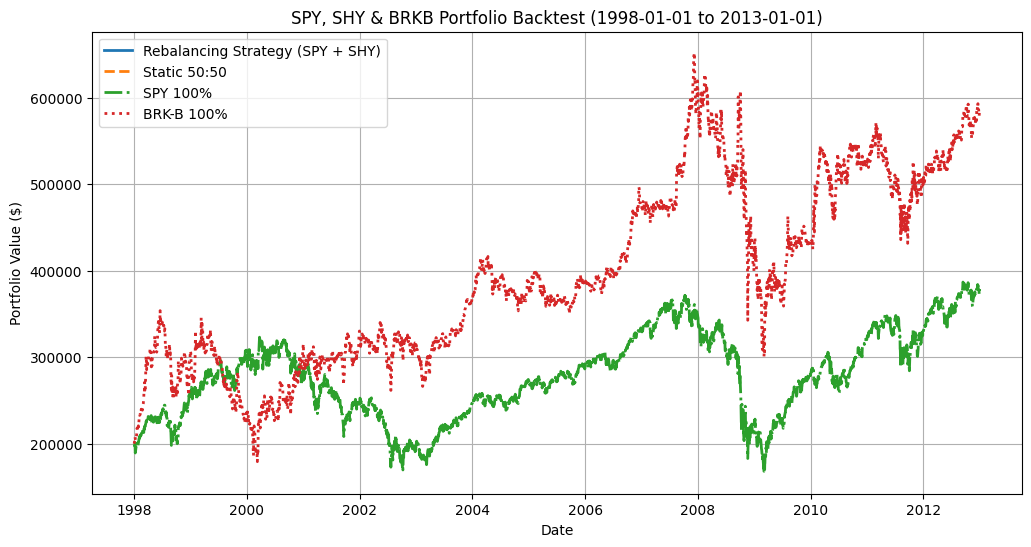

[*********************100%***********************]  3 of 3 completed


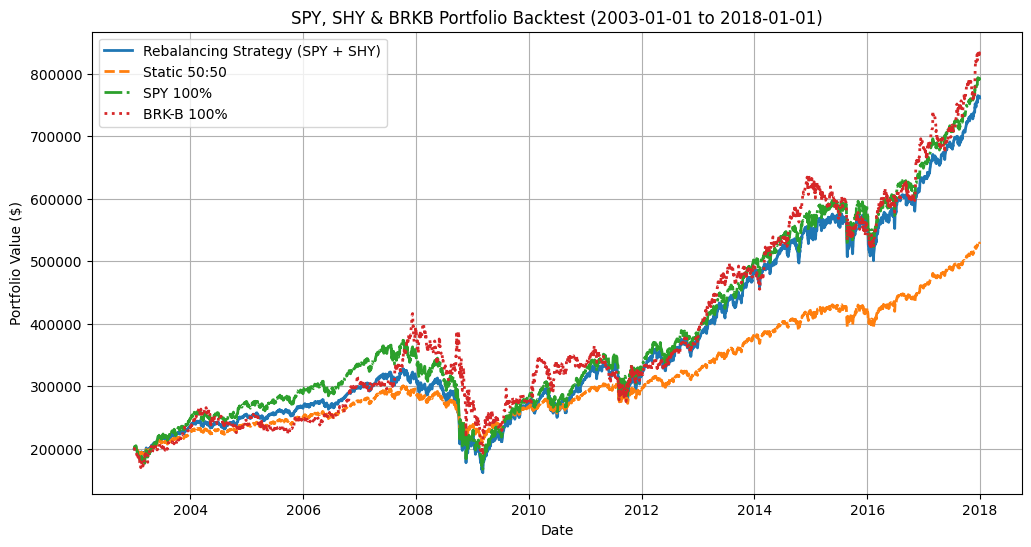

[*********************100%***********************]  3 of 3 completed


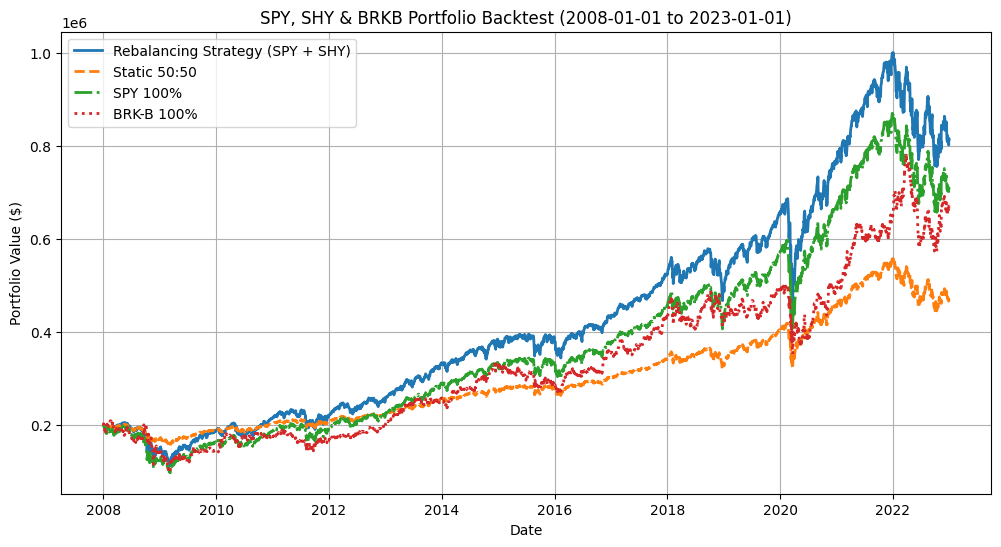

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 백테스트 기간 설정 (1998년부터 15년씩 분할)
time_periods = [("1998-01-01", "2013-01-01"), ("2003-01-01", "2018-01-01"), ("2008-01-01", "2023-01-01")]

tickers = ["SPY", "SHY", "BRK-B"]  # VOO 대신 SPY 사용, BIL 대신 SHY 사용, BRK-B 추가

for start_date, end_date in time_periods:
    # 데이터 다운로드
    data = yf.download(tickers, start=start_date, end=end_date, actions=True)
    if data.empty:
        print(f"No data available for the period {start_date} to {end_date}")
        continue

    # 초기 투자금 설정 (모든 포트폴리오 동일한 $200,000)
    initial_cash = 200000
    initial_spy_cash = initial_cash / 2  # 리밸런싱 전략용 (50% SPY, 50% SHY)
    initial_shy_cash = initial_cash / 2  # 리밸런싱 전략용
    initial_brkb_cash = initial_cash  # BRKB 100% 투자

    # 최초 주식 보유량
    initial_spy_price = data["Close"]["SPY"].iloc[0]
    initial_shy_price = data["Close"]["SHY"].iloc[0]
    initial_brkb_price = data["Close"]["BRK-B"].iloc[0]

    spy_shares = initial_spy_cash / initial_spy_price
    shy_shares = initial_shy_cash / initial_shy_price
    brkb_shares = initial_brkb_cash / initial_brkb_price  # BRK-B 100% 전략 추가

    # 최초 기준 SPY 가격
    peak_spy_price = initial_spy_price  # 최대 가격 기록

    # 결과 저장 리스트
    portfolio_values = []

    for date, row in data.iterrows():
        spy_price = row["Close"]["SPY"]
        shy_price = row["Close"]["SHY"]  # SHY는 단기 국채 ETF
        brkb_price = row["Close"]["BRK-B"]
        shy_dividend = row.get(("Dividends", "SHY"), 0)  # SHY 배당금 (없으면 0으로 처리)

        # 배당금 입금 (SHY 보유량 기준)
        shy_cash = shy_shares * shy_dividend

        # 포트폴리오 평가
        total_value = (spy_shares * spy_price) + (shy_shares * shy_price)
        brkb_value = brkb_shares * brkb_price  # BRK-B 100% 포트폴리오 평가

        portfolio_values.append((date, total_value, brkb_value))

        # SPY가 새로운 최고점인지 확인
        if spy_price > peak_spy_price:
            peak_spy_price = spy_price  # 새로운 기준 가격으로 설정 (매도 전략 제거)

        # SPY 가격이 최고점 대비 10% 하락하면 SHY를 30% 팔아서 SPY 매수
        elif spy_price <= 0.9 * peak_spy_price:
            rebalance_amount = shy_shares * 0.3  # SHY에서 30% 매도
            shy_shares -= rebalance_amount
            spy_shares += (rebalance_amount * shy_price) / spy_price  # SPY 추가 매수
            peak_spy_price = spy_price  # 새로운 기준 가격

    # DataFrame으로 변환
    portfolio_df = pd.DataFrame(portfolio_values, columns=["Date", "Portfolio Value", "BRKB Portfolio Value"])
    portfolio_df.set_index("Date", inplace=True)

    # 모든 포트폴리오의 초기 투자금을 동일하게 적용 ($200,000 기준)
    portfolio_df["50:50 Portfolio"] = (initial_cash / 2 / data["Close"]["SPY"].iloc[0]) * data["Close"]["SPY"] + (initial_cash / 2 / data["Close"]["SHY"].iloc[0]) * data["Close"]["SHY"]
    portfolio_df["SPY 100% Portfolio"] = (initial_cash / data["Close"]["SPY"].iloc[0]) * data["Close"]["SPY"]
    portfolio_df["BRKB 100% Portfolio"] = (initial_cash / data["Close"]["BRK-B"].iloc[0]) * data["Close"]["BRK-B"]

    # 성과 시각화
    plt.figure(figsize=(12,6))
    plt.plot(portfolio_df.index, portfolio_df["Portfolio Value"], label="Rebalancing Strategy (SPY + SHY)", linewidth=2)
    plt.plot(portfolio_df.index, portfolio_df["50:50 Portfolio"], label="Static 50:50", linestyle="--", linewidth=2)
    plt.plot(portfolio_df.index, portfolio_df["SPY 100% Portfolio"], label="SPY 100%", linestyle="-.", linewidth=2)
    plt.plot(portfolio_df.index, portfolio_df["BRKB 100% Portfolio"], label="BRK-B 100%", linestyle=":", linewidth=2)
    plt.legend()
    plt.title(f"SPY, SHY & BRKB Portfolio Backtest ({start_date} to {end_date})")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value ($)")
    plt.grid()
    plt.show()


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 데이터 다운로드
start_date = "2010-01-01"
end_date = "2024-01-01"
tickers = ["TQQQ", "SQQQ"]
data = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]

# 초기 투자금
initial_cash = 100000
long_ratio = 0.7  # TQQQ 롱 비율
short_ratio = 0.3  # SQQQ 숏 비율

# 초기 주식 보유량
tqqq_shares = (initial_cash * long_ratio) / data["TQQQ"].iloc[0]
sqqq_shares = (initial_cash * short_ratio) / data["SQQQ"].iloc[0]

# 포트폴리오 가치 계산
portfolio_values = []
for date, row in data.iterrows():
    tqqq_value = tqqq_shares * row["TQQQ"]
    sqqq_value = sqqq_shares * row["SQQQ"] * -1  # 숏 포지션이므로 음수
    total_value = tqqq_value + sqqq_value
    portfolio_values.append((date, total_value))

# DataFrame 변환
portfolio_df = pd.DataFrame(portfolio_values, columns=["Date", "Portfolio Value"])
portfolio_df.set_index("Date", inplace=True)

# 성과 시각화
plt.figure(figsize=(12,6))
plt.plot(portfolio_df.index, portfolio_df["Portfolio Value"], label="Long 70% TQQQ / Short 30% SQQQ", linewidth=2)
plt.title("TQQQ & SQQQ Long-Short Strategy (2010-Present)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid()
plt.show()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


KeyError: 'Adj Close'

[*********************100%***********************]  2 of 2 completed


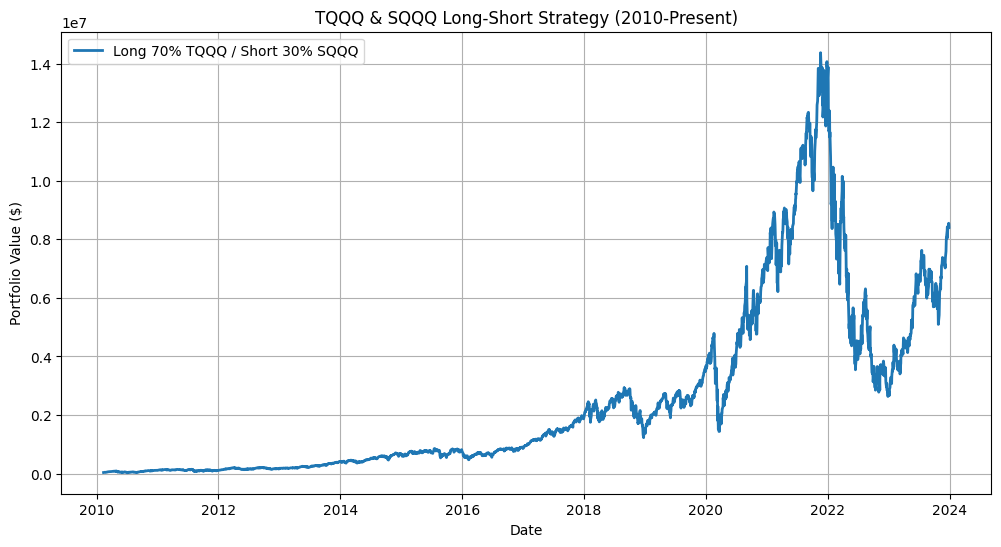

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 데이터 다운로드
start_date = "2010-01-01"
end_date = "2024-01-01"
tickers = ["TQQQ", "SQQQ"]
data = yf.download(tickers, start=start_date, end=end_date)

# 'Adj Close'가 없을 경우 'Close' 사용
if "Adj Close" in data.columns:
    data = data["Adj Close"]
else:
    data = data["Close"]

data = data.rename(columns={"TQQQ": "TQQQ Price", "SQQQ": "SQQQ Price"})

# 초기 투자금
initial_cash = 100000
long_ratio = 0.7  # TQQQ 롱 비율
short_ratio = 0.3  # SQQQ 숏 비율

# 초기 주식 보유량
tqqq_shares = (initial_cash * long_ratio) / data["TQQQ Price"].iloc[0]
sqqq_shares = (initial_cash * short_ratio) / data["SQQQ Price"].iloc[0]

# 포트폴리오 가치 계산
portfolio_values = []
for date, row in data.iterrows():
    tqqq_value = tqqq_shares * row["TQQQ Price"]
    sqqq_value = sqqq_shares * row["SQQQ Price"] * -1  # 숏 포지션이므로 음수
    total_value = tqqq_value + sqqq_value
    portfolio_values.append((date, total_value))

# DataFrame 변환
portfolio_df = pd.DataFrame(portfolio_values, columns=["Date", "Portfolio Value"])
portfolio_df.set_index("Date", inplace=True)

# 성과 시각화
plt.figure(figsize=(12,6))
plt.plot(portfolio_df.index, portfolio_df["Portfolio Value"], label="Long 70% TQQQ / Short 30% SQQQ", linewidth=2)
plt.title("TQQQ & SQQQ Long-Short Strategy (2010-Present)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid()
plt.show()


[*********************100%***********************]  2 of 2 completed


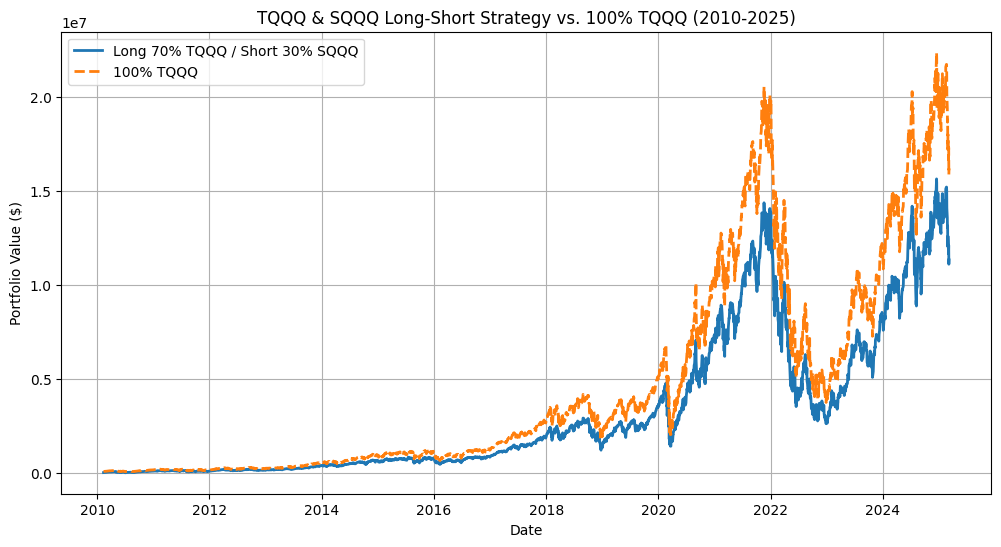

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 데이터 다운로드
start_date = "2010-01-01"
end_date = "2025-03-10"
tickers = ["TQQQ", "SQQQ"]
data = yf.download(tickers, start=start_date, end=end_date)

# 'Adj Close'가 없을 경우 'Close' 사용
if "Adj Close" in data.columns:
    data = data["Adj Close"]
else:
    data = data["Close"]

data = data.rename(columns={"TQQQ": "TQQQ Price", "SQQQ": "SQQQ Price"})

# 초기 투자금
initial_cash = 100000
long_ratio = 0.7  # TQQQ 롱 비율
short_ratio = 0.3  # SQQQ 숏 비율

# 초기 주식 보유량
tqqq_shares = (initial_cash * long_ratio) / data["TQQQ Price"].iloc[0]
sqqq_shares = (initial_cash * short_ratio) / data["SQQQ Price"].iloc[0]
full_tqqq_shares = initial_cash / data["TQQQ Price"].iloc[0]  # 100% TQQQ 투자

# 포트폴리오 가치 계산
portfolio_values = []
tqqq_full_values = []
for date, row in data.iterrows():
    tqqq_value = tqqq_shares * row["TQQQ Price"]
    sqqq_value = sqqq_shares * row["SQQQ Price"] * -1  # 숏 포지션이므로 음수
    total_value = tqqq_value + sqqq_value
    portfolio_values.append((date, total_value))

    # 100% TQQQ 투자 포트폴리오 계산
    full_tqqq_value = full_tqqq_shares * row["TQQQ Price"]
    tqqq_full_values.append((date, full_tqqq_value))

# DataFrame 변환
portfolio_df = pd.DataFrame(portfolio_values, columns=["Date", "Portfolio Value"])
portfolio_df.set_index("Date", inplace=True)

full_tqqq_df = pd.DataFrame(tqqq_full_values, columns=["Date", "TQQQ 100% Value"])
full_tqqq_df.set_index("Date", inplace=True)

# 두 포트폴리오 비교 시각화
plt.figure(figsize=(12,6))
plt.plot(portfolio_df.index, portfolio_df["Portfolio Value"], label="Long 70% TQQQ / Short 30% SQQQ", linewidth=2)
plt.plot(full_tqqq_df.index, full_tqqq_df["TQQQ 100% Value"], label="100% TQQQ", linestyle="--", linewidth=2)
plt.title("TQQQ & SQQQ Long-Short Strategy vs. 100% TQQQ (2010-2025)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
! pip install numpy_financial

In [ ]:
#import scipy as sp
import numpy_financial as npf

a = 1000
n = 1
r = 0.05
#s_simple = sp.fv(r, n, 0, a)
s_simple = npf.fv(r, n, 0, -a)
print(s_simple)

1050.0


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 데이터 다운로드
start_date = "2000-01-01"
end_date = "2025-03-10"
tickers = ["TQQQ", "SQQQ", "QQQ"]
data = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]

data = data.rename(columns={"TQQQ": "TQQQ Price", "SQQQ": "SQQQ Price", "QQQ": "QQQ Price"})

# 200일 이동평균선 계산
data["200DMA"] = data["QQQ Price"].rolling(window=200).mean()

# 투자 전략 실행
initial_cash = 10000
cash = initial_cash
tqqq_shares = 0
sqqq_shares = 0
in_bear_market = True  # 200일 이동평균선 아래에 있을 때만 실행

portfolio_values = []

for i in range(1, len(data)):
    current_price = data["QQQ Price"].iloc[i]
    prev_price = data["QQQ Price"].iloc[i - 1]
    moving_avg = data["200DMA"].iloc[i]

    # 200일 이동평균선 위로 올라오면 종료
    if current_price > moving_avg:
        in_bear_market = False

    if in_bear_market:
        if current_price > prev_price:
            # 주가 상승 → SQQQ 매수 ($100)
            if cash >= 100:
                cash -= 100
                sqqq_shares += 100 / data["SQQQ Price"].iloc[i]
        elif current_price < prev_price:
            # 주가 하락 → TQQQ 매수 ($100)
            if cash >= 100:
                cash -= 100
                tqqq_shares += 100 / data["TQQQ Price"].iloc[i]

    # 포트폴리오 평가
    tqqq_value = tqqq_shares * data["TQQQ Price"].iloc[i]
    sqqq_value = sqqq_shares * data["SQQQ Price"].iloc[i]
    total_value = cash + tqqq_value + sqqq_value
    portfolio_values.append((data.index[i], total_value))

# DataFrame 변환
portfolio_df = pd.DataFrame(portfolio_values, columns=["Date", "Portfolio Value"])
portfolio_df.set_index("Date", inplace=True)

# 성과 시각화
plt.figure(figsize=(12,6))
plt.plot(portfolio_df.index, portfolio_df["Portfolio Value"], label="Bear Market Strategy", linewidth=2)
plt.title("TQQQ & SQQQ Alternating Buy Strategy in Bear Market")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid()
plt.show()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


KeyError: 'Adj Close'

[*********************100%***********************]  3 of 3 completed


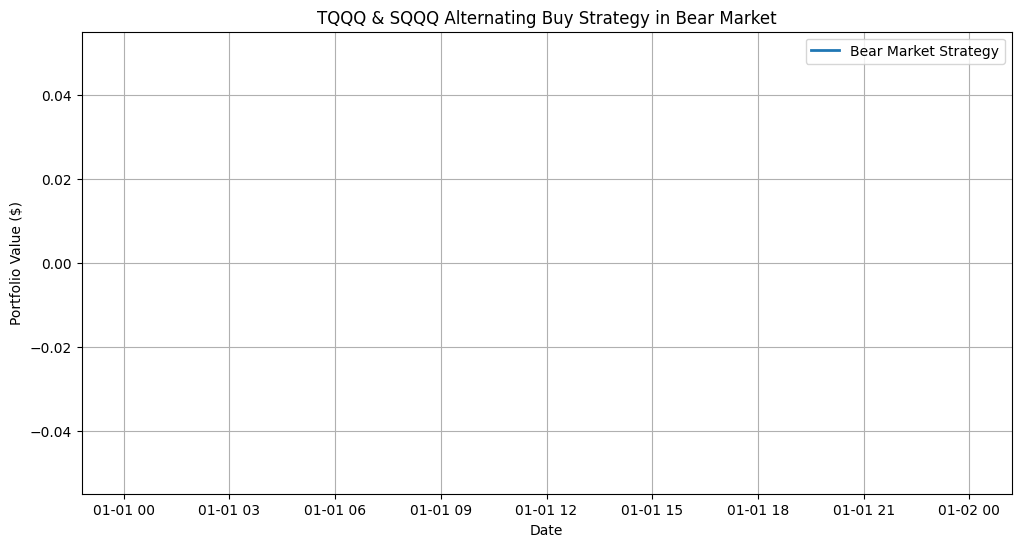

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 데이터 다운로드
start_date = "2000-01-01"
end_date = "2025-03-10"
tickers = ["TQQQ", "SQQQ", "QQQ"]
data = yf.download(tickers, start=start_date, end=end_date)

# 'Adj Close'가 없을 경우 'Close' 사용
if "Adj Close" in data.columns:
    data = data["Adj Close"]
else:
    data = data["Close"]

data = data.rename(columns={"TQQQ": "TQQQ Price", "SQQQ": "SQQQ Price", "QQQ": "QQQ Price"})

# 200일 이동평균선 계산
data["200DMA"] = data["QQQ Price"].rolling(window=200).mean()

# 투자 전략 실행
initial_cash = 10000
cash = initial_cash
tqqq_shares = 0
sqqq_shares = 0
in_bear_market = True  # 200일 이동평균선 아래에 있을 때만 실행

portfolio_values = []

for i in range(1, len(data)):
    current_price = data["QQQ Price"].iloc[i]
    prev_price = data["QQQ Price"].iloc[i - 1]
    moving_avg = data["200DMA"].iloc[i]

    # 200일 이동평균선 위로 올라오면 종료
    if current_price > moving_avg:
        in_bear_market = False

    if in_bear_market:
        if current_price > prev_price:
            # 주가 상승 → SQQQ 매수 ($100)
            if cash >= 100:
                cash -= 100
                sqqq_shares += 100 / data["SQQQ Price"].iloc[i]
        elif current_price < prev_price:
            # 주가 하락 → TQQQ 매수 ($100)
            if cash >= 100:
                cash -= 100
                tqqq_shares += 100 / data["TQQQ Price"].iloc[i]

    # 포트폴리오 평가
    tqqq_value = tqqq_shares * data["TQQQ Price"].iloc[i]
    sqqq_value = sqqq_shares * data["SQQQ Price"].iloc[i]
    total_value = cash + tqqq_value + sqqq_value
    portfolio_values.append((data.index[i], total_value))

# DataFrame 변환
portfolio_df = pd.DataFrame(portfolio_values, columns=["Date", "Portfolio Value"])
portfolio_df.set_index("Date", inplace=True)

# 성과 시각화
plt.figure(figsize=(12,6))
plt.plot(portfolio_df.index, portfolio_df["Portfolio Value"], label="Bear Market Strategy", linewidth=2)
plt.title("TQQQ & SQQQ Alternating Buy Strategy in Bear Market")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid()
plt.show()

[*********************100%***********************]  3 of 3 completed


            Portfolio Value
Date                       
2010-02-12          10000.0
2010-02-16          10000.0
2010-02-17          10000.0
2010-02-18          10000.0
2010-02-19          10000.0
Total portfolio records: 3790


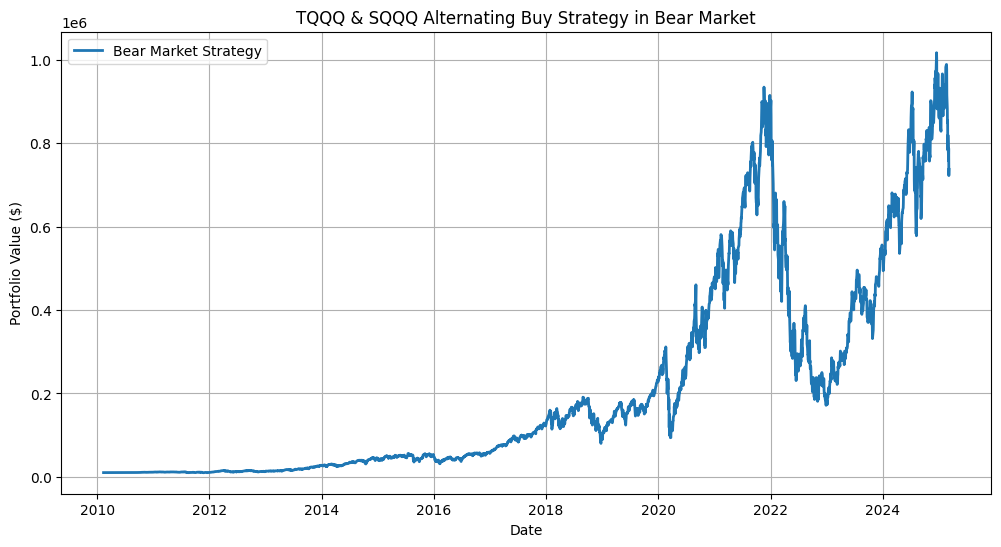

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 데이터 다운로드
start_date = "2000-01-01"
end_date = "2025-03-10"
tickers = ["TQQQ", "SQQQ", "QQQ"]
data = yf.download(tickers, start=start_date, end=end_date)

# 'Adj Close'가 없을 경우 'Close' 사용
if "Adj Close" in data.columns:
    data = data["Adj Close"]
else:
    data = data["Close"]

data = data.rename(columns={"TQQQ": "TQQQ Price", "SQQQ": "SQQQ Price", "QQQ": "QQQ Price"})

# 200일 이동평균선 계산
data["200DMA"] = data["QQQ Price"].rolling(window=200, min_periods=200).mean()
data.dropna(inplace=True)  # NaN 제거

# 투자 전략 실행
initial_cash = 10000
cash = initial_cash
tqqq_shares = 0
sqqq_shares = 0
in_bear_market = False  # 초기에는 False로 설정

portfolio_values = []

for i in range(1, len(data)):
    current_price = data["QQQ Price"].iloc[i]
    prev_price = data["QQQ Price"].iloc[i - 1]
    moving_avg = data["200DMA"].iloc[i]

    # 200일 이동평균선 아래로 내려가면 약세장 시작
    if current_price < moving_avg:
        in_bear_market = True

    # 200일 이동평균선 위로 올라오면 종료
    elif current_price > moving_avg:
        in_bear_market = False

    if in_bear_market:
        if current_price > prev_price:
            # 주가 상승 → SQQQ 매수 ($100)
            if cash >= 100:
                cash -= 100
                sqqq_shares += 100 / data["SQQQ Price"].iloc[i]
        elif current_price < prev_price:
            # 주가 하락 → TQQQ 매수 ($100)
            if cash >= 100:
                cash -= 100
                tqqq_shares += 100 / data["TQQQ Price"].iloc[i]

    # 포트폴리오 평가
    tqqq_value = tqqq_shares * data["TQQQ Price"].iloc[i]
    sqqq_value = sqqq_shares * data["SQQQ Price"].iloc[i]
    total_value = cash + tqqq_value + sqqq_value
    portfolio_values.append((data.index[i], total_value))

# DataFrame 변환
portfolio_df = pd.DataFrame(portfolio_values, columns=["Date", "Portfolio Value"])
portfolio_df.set_index("Date", inplace=True)

# 포트폴리오 데이터 확인 (디버깅용)
print(portfolio_df.head())
print("Total portfolio records:", len(portfolio_df))

# 성과 시각화
plt.figure(figsize=(12,6))
plt.plot(portfolio_df.index, portfolio_df["Portfolio Value"], label="Bear Market Strategy", linewidth=2)
plt.title("TQQQ & SQQQ Alternating Buy Strategy in Bear Market")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
! pip install ace_tools

[*********************100%***********************]  3 of 3 completed


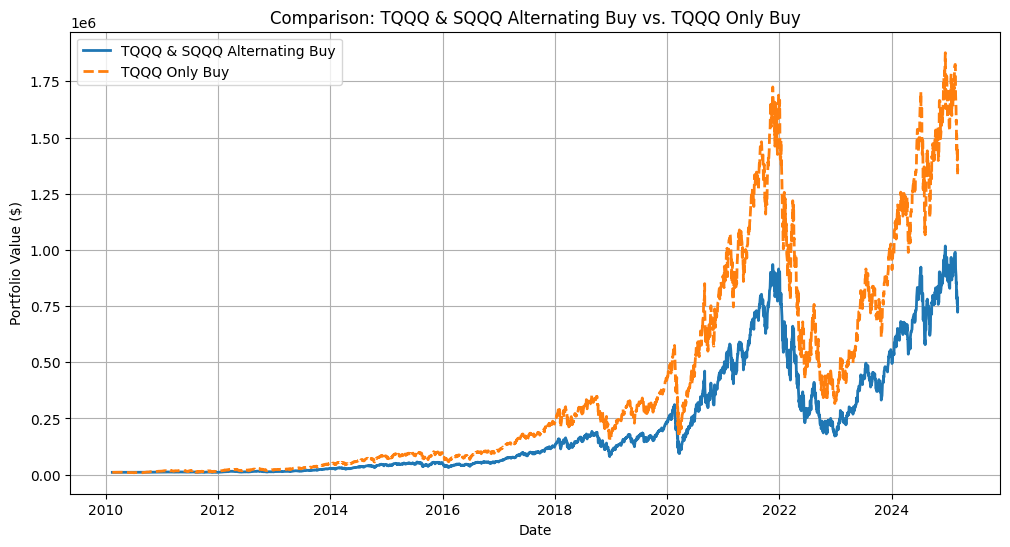

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 데이터 다운로드
start_date = "2000-01-01"
end_date = "2025-03-10"
tickers = ["TQQQ", "SQQQ", "QQQ"]
data = yf.download(tickers, start=start_date, end=end_date)

# 'Adj Close'가 없을 경우 'Close' 사용
if "Adj Close" in data.columns:
    data = data["Adj Close"]
else:
    data = data["Close"]

data = data.rename(columns={"TQQQ": "TQQQ Price", "SQQQ": "SQQQ Price", "QQQ": "QQQ Price"})

# 200일 이동평균선 계산
data["200DMA"] = data["QQQ Price"].rolling(window=200, min_periods=200).mean()
data.dropna(inplace=True)  # NaN 제거

# 투자 전략 실행
initial_cash = 10000
cash_both = initial_cash
cash_tqqq_only = initial_cash
tqqq_shares_both = 0
sqqq_shares_both = 0
tqqq_shares_tqqq_only = 0
in_bear_market = False  # 초기에는 False로 설정

portfolio_values_both = []
portfolio_values_tqqq_only = []
investment_records = []

for i in range(1, len(data)):
    current_price = data["QQQ Price"].iloc[i]
    prev_price = data["QQQ Price"].iloc[i - 1]
    moving_avg = data["200DMA"].iloc[i]

    # 200일 이동평균선 아래로 내려가면 약세장 시작
    if current_price < moving_avg:
        in_bear_market = True

    # 200일 이동평균선 위로 올라오면 종료
    elif current_price > moving_avg:
        in_bear_market = False

    if in_bear_market:
        if current_price > prev_price:
            # 주가 상승 → SQQQ 매수 ($100)
            if cash_both >= 100:
                cash_both -= 100
                sqqq_shares_both += 100 / data["SQQQ Price"].iloc[i]
                investment_records.append((data.index[i], "SQQQ", 100))
        elif current_price < prev_price:
            # 주가 하락 → TQQQ 매수 ($100)
            if cash_both >= 100:
                cash_both -= 100
                tqqq_shares_both += 100 / data["TQQQ Price"].iloc[i]
                investment_records.append((data.index[i], "TQQQ", 100))

    # TQQQ Only 전략: 주가 상승일에만 매수
    if current_price > prev_price:
        if cash_tqqq_only >= 100:
            cash_tqqq_only -= 100
            tqqq_shares_tqqq_only += 100 / data["TQQQ Price"].iloc[i]
            investment_records.append((data.index[i], "TQQQ Only", 100))

    # 포트폴리오 평가
    tqqq_value_both = tqqq_shares_both * data["TQQQ Price"].iloc[i]
    sqqq_value_both = sqqq_shares_both * data["SQQQ Price"].iloc[i]
    total_value_both = cash_both + tqqq_value_both + sqqq_value_both
    portfolio_values_both.append((data.index[i], total_value_both))

    tqqq_value_tqqq_only = tqqq_shares_tqqq_only * data["TQQQ Price"].iloc[i]
    total_value_tqqq_only = cash_tqqq_only + tqqq_value_tqqq_only
    portfolio_values_tqqq_only.append((data.index[i], total_value_tqqq_only))

# DataFrame 변환
portfolio_df_both = pd.DataFrame(portfolio_values_both, columns=["Date", "Portfolio Value (Both)"])
portfolio_df_both.set_index("Date", inplace=True)

portfolio_df_tqqq_only = pd.DataFrame(portfolio_values_tqqq_only, columns=["Date", "Portfolio Value (TQQQ Only)"])
portfolio_df_tqqq_only.set_index("Date", inplace=True)

investment_df = pd.DataFrame(investment_records, columns=["Date", "Asset", "Amount Invested"])
investment_df.set_index("Date", inplace=True)

# 포트폴리오 비교 시각화
plt.figure(figsize=(12,6))
plt.plot(portfolio_df_both.index, portfolio_df_both["Portfolio Value (Both)"], label="TQQQ & SQQQ Alternating Buy", linewidth=2)
plt.plot(portfolio_df_tqqq_only.index, portfolio_df_tqqq_only["Portfolio Value (TQQQ Only)"], label="TQQQ Only Buy", linestyle="--", linewidth=2)
plt.title("Comparison: TQQQ & SQQQ Alternating Buy vs. TQQQ Only Buy")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid()
plt.show()

# 투자 기록 표시
import ace_tools as tools
tools.display_dataframe_to_user(name="Investment Records", dataframe=investment_df)

In [ ]:
! pip install ace_tools

In [ ]:
import ace_tools as tools
tools.display_dataframe_to_user(name="Investment Records", dataframe=investment_df)

ModuleNotFoundError: No module named 'ace_tools'

[*********************100%***********************]  3 of 3 completed


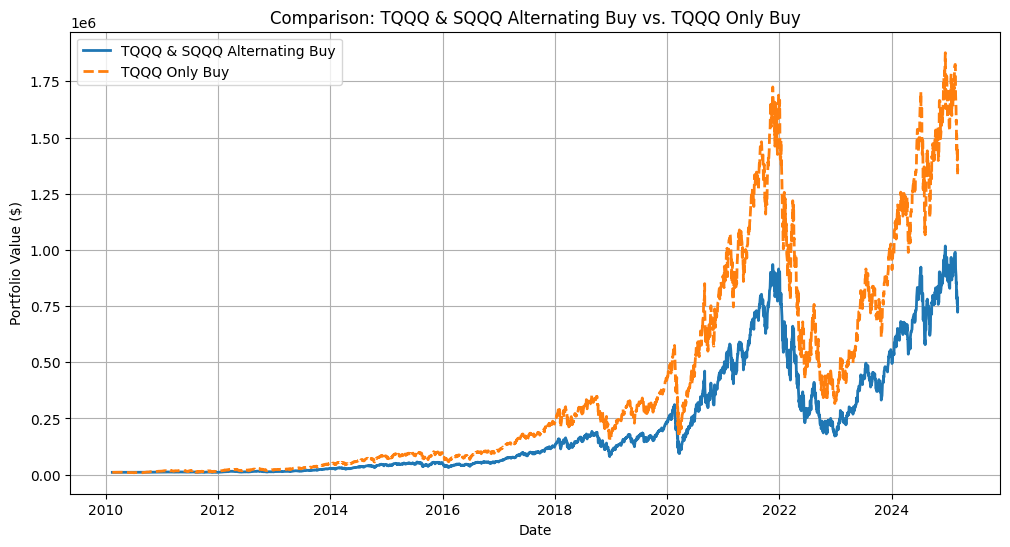

Investment records saved to investment_records.csv
                Asset  Amount Invested
Date                                  
2010-02-12  TQQQ Only              100
2010-02-16  TQQQ Only              100
2010-02-17  TQQQ Only              100
2010-02-18  TQQQ Only              100
2010-02-24  TQQQ Only              100


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 데이터 다운로드
start_date = "2000-01-01"
end_date = "2025-03-10"
tickers = ["TQQQ", "SQQQ", "QQQ"]
data = yf.download(tickers, start=start_date, end=end_date)

# 'Adj Close'가 없을 경우 'Close' 사용
if "Adj Close" in data.columns:
    data = data["Adj Close"]
else:
    data = data["Close"]

data = data.rename(columns={"TQQQ": "TQQQ Price", "SQQQ": "SQQQ Price", "QQQ": "QQQ Price"})

# 200일 이동평균선 계산
data["200DMA"] = data["QQQ Price"].rolling(window=200, min_periods=200).mean()
data.dropna(inplace=True)  # NaN 제거

# 투자 전략 실행
initial_cash = 10000
cash_both = initial_cash
cash_tqqq_only = initial_cash
tqqq_shares_both = 0
sqqq_shares_both = 0
tqqq_shares_tqqq_only = 0
in_bear_market = False  # 초기에는 False로 설정

portfolio_values_both = []
portfolio_values_tqqq_only = []
investment_records = []

for i in range(1, len(data)):
    current_price = data["QQQ Price"].iloc[i]
    prev_price = data["QQQ Price"].iloc[i - 1]
    moving_avg = data["200DMA"].iloc[i]

    # 200일 이동평균선 아래로 내려가면 약세장 시작
    if current_price < moving_avg:
        in_bear_market = True

    # 200일 이동평균선 위로 올라오면 종료
    elif current_price > moving_avg:
        in_bear_market = False

    if in_bear_market:
        if current_price > prev_price:
            # 주가 상승 → SQQQ 매수 ($100)
            if cash_both >= 100:
                cash_both -= 100
                sqqq_shares_both += 100 / data["SQQQ Price"].iloc[i]
                investment_records.append((data.index[i], "SQQQ", 100))
        elif current_price < prev_price:
            # 주가 하락 → TQQQ 매수 ($100)
            if cash_both >= 100:
                cash_both -= 100
                tqqq_shares_both += 100 / data["TQQQ Price"].iloc[i]
                investment_records.append((data.index[i], "TQQQ", 100))

    # TQQQ Only 전략: 주가 상승일에만 매수
    if current_price > prev_price:
        if cash_tqqq_only >= 100:
            cash_tqqq_only -= 100
            tqqq_shares_tqqq_only += 100 / data["TQQQ Price"].iloc[i]
            investment_records.append((data.index[i], "TQQQ Only", 100))

    # 포트폴리오 평가
    tqqq_value_both = tqqq_shares_both * data["TQQQ Price"].iloc[i]
    sqqq_value_both = sqqq_shares_both * data["SQQQ Price"].iloc[i]
    total_value_both = cash_both + tqqq_value_both + sqqq_value_both
    portfolio_values_both.append((data.index[i], total_value_both))

    tqqq_value_tqqq_only = tqqq_shares_tqqq_only * data["TQQQ Price"].iloc[i]
    total_value_tqqq_only = cash_tqqq_only + tqqq_value_tqqq_only
    portfolio_values_tqqq_only.append((data.index[i], total_value_tqqq_only))

# DataFrame 변환
portfolio_df_both = pd.DataFrame(portfolio_values_both, columns=["Date", "Portfolio Value (Both)"])
portfolio_df_both.set_index("Date", inplace=True)

portfolio_df_tqqq_only = pd.DataFrame(portfolio_values_tqqq_only, columns=["Date", "Portfolio Value (TQQQ Only)"])
portfolio_df_tqqq_only.set_index("Date", inplace=True)

investment_df = pd.DataFrame(investment_records, columns=["Date", "Asset", "Amount Invested"])
investment_df.set_index("Date", inplace=True)

# 포트폴리오 비교 시각화
plt.figure(figsize=(12,6))
plt.plot(portfolio_df_both.index, portfolio_df_both["Portfolio Value (Both)"], label="TQQQ & SQQQ Alternating Buy", linewidth=2)
plt.plot(portfolio_df_tqqq_only.index, portfolio_df_tqqq_only["Portfolio Value (TQQQ Only)"], label="TQQQ Only Buy", linestyle="--", linewidth=2)
plt.title("Comparison: TQQQ & SQQQ Alternating Buy vs. TQQQ Only Buy")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid()
plt.show()

# 투자 기록 저장 및 출력
investment_df.to_csv("investment_records.csv")
print("Investment records saved to investment_records.csv")
print(investment_df.head())


[*********************100%***********************]  3 of 3 completed


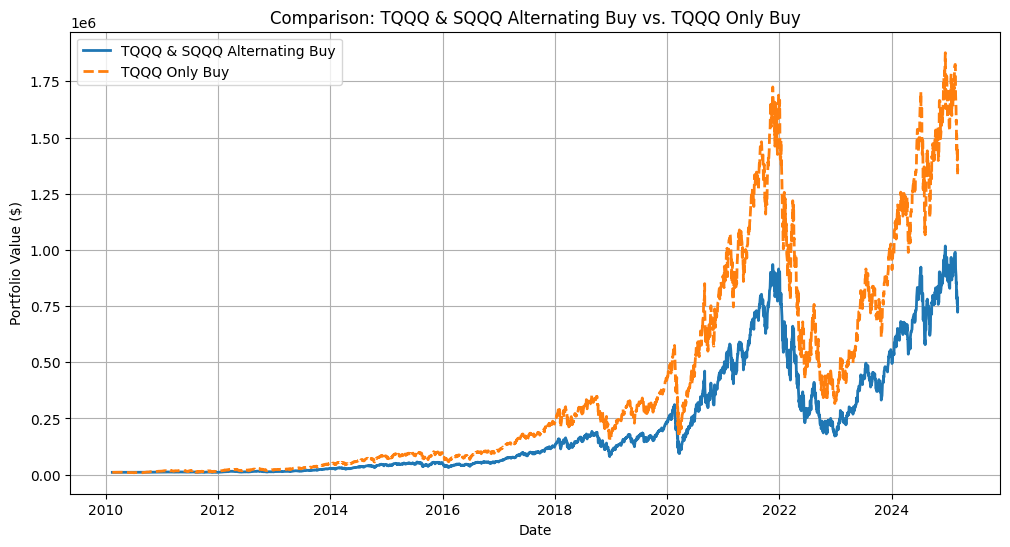

Investment records saved to investment_records.csv
             Strategy Asset  Amount Invested
Date                                        
2010-02-12  TQQQ Only  TQQQ              100
2010-02-16  TQQQ Only  TQQQ              100
2010-02-17  TQQQ Only  TQQQ              100
2010-02-18  TQQQ Only  TQQQ              100
2010-02-24  TQQQ Only  TQQQ              100


ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 데이터 다운로드
start_date = "2000-01-01"
end_date = "2025-03-10"
tickers = ["TQQQ", "SQQQ", "QQQ"]
data = yf.download(tickers, start=start_date, end=end_date)

# 'Adj Close'가 없을 경우 'Close' 사용
if "Adj Close" in data.columns:
    data = data["Adj Close"]
else:
    data = data["Close"]

data = data.rename(columns={"TQQQ": "TQQQ Price", "SQQQ": "SQQQ Price", "QQQ": "QQQ Price"})

# 200일 이동평균선 계산
data["200DMA"] = data["QQQ Price"].rolling(window=200, min_periods=200).mean()
data.dropna(inplace=True)  # NaN 제거

# 투자 전략 실행
initial_cash = 10000
cash_both = initial_cash
cash_tqqq_only = initial_cash
tqqq_shares_both = 0
sqqq_shares_both = 0
tqqq_shares_tqqq_only = 0
in_bear_market = False  # 초기에는 False로 설정

portfolio_values_both = []
portfolio_values_tqqq_only = []
investment_records = []

for i in range(1, len(data)):
    current_price = data["QQQ Price"].iloc[i]
    prev_price = data["QQQ Price"].iloc[i - 1]
    moving_avg = data["200DMA"].iloc[i]

    # 200일 이동평균선 아래로 내려가면 약세장 시작
    if current_price < moving_avg:
        in_bear_market = True

    # 200일 이동평균선 위로 올라오면 종료
    elif current_price > moving_avg:
        in_bear_market = False

    if in_bear_market:
        if current_price > prev_price:
            # 주가 상승 → SQQQ 매수 ($100)
            if cash_both >= 100:
                cash_both -= 100
                sqqq_shares_both += 100 / data["SQQQ Price"].iloc[i]
                investment_records.append((data.index[i], "Alternative Strategy", "SQQQ", 100))
        elif current_price < prev_price:
            # 주가 하락 → TQQQ 매수 ($100)
            if cash_both >= 100:
                cash_both -= 100
                tqqq_shares_both += 100 / data["TQQQ Price"].iloc[i]
                investment_records.append((data.index[i], "Alternative Strategy", "TQQQ", 100))

    # TQQQ Only 전략: 주가 상승일에만 매수
    if current_price > prev_price:
        if cash_tqqq_only >= 100:
            cash_tqqq_only -= 100
            tqqq_shares_tqqq_only += 100 / data["TQQQ Price"].iloc[i]
            investment_records.append((data.index[i], "TQQQ Only", "TQQQ", 100))

    # 포트폴리오 평가
    tqqq_value_both = tqqq_shares_both * data["TQQQ Price"].iloc[i]
    sqqq_value_both = sqqq_shares_both * data["SQQQ Price"].iloc[i]
    total_value_both = cash_both + tqqq_value_both + sqqq_value_both
    portfolio_values_both.append((data.index[i], total_value_both))

    tqqq_value_tqqq_only = tqqq_shares_tqqq_only * data["TQQQ Price"].iloc[i]
    total_value_tqqq_only = cash_tqqq_only + tqqq_value_tqqq_only
    portfolio_values_tqqq_only.append((data.index[i], total_value_tqqq_only))

# DataFrame 변환
portfolio_df_both = pd.DataFrame(portfolio_values_both, columns=["Date", "Portfolio Value (Both)"], index=[x[0] for x in portfolio_values_both])
portfolio_df_tqqq_only = pd.DataFrame(portfolio_values_tqqq_only, columns=["Date", "Portfolio Value (TQQQ Only)"], index=[x[0] for x in portfolio_values_tqqq_only])

investment_df = pd.DataFrame(investment_records, columns=["Date", "Strategy", "Asset", "Amount Invested"])
investment_df.set_index("Date", inplace=True)

# 포트폴리오 비교 시각화
plt.figure(figsize=(12,6))
plt.plot(portfolio_df_both.index, portfolio_df_both["Portfolio Value (Both)"], label="TQQQ & SQQQ Alternating Buy", linewidth=2)
plt.plot(portfolio_df_tqqq_only.index, portfolio_df_tqqq_only["Portfolio Value (TQQQ Only)"], label="TQQQ Only Buy", linestyle="--", linewidth=2)
plt.title("Comparison: TQQQ & SQQQ Alternating Buy vs. TQQQ Only Buy")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid()
plt.show()

# 투자 기록 저장 및 출력
investment_df.to_csv("investment_records.csv")
print("Investment records saved to investment_records.csv")
print(investment_df.head())

# 투자 기록을 표로 표시
import ace_tools as tools
tools.display_dataframe_to_user(name="Investment Records", dataframe=investment_df)

[*********************100%***********************]  3 of 3 completed


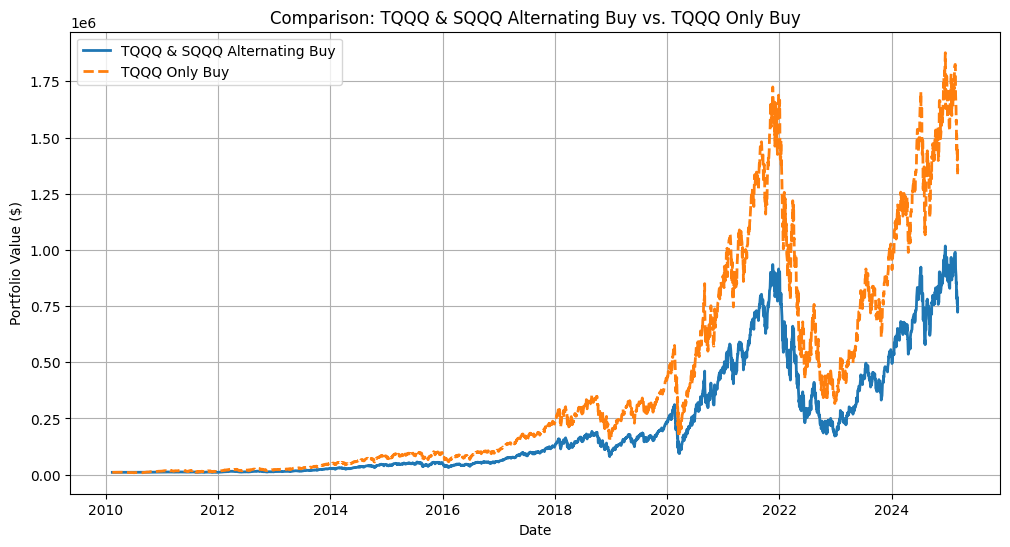

Investment records saved to investment_records.csv
             Strategy Asset  Amount Invested
Date                                        
2010-02-12  TQQQ Only  TQQQ              100
2010-02-16  TQQQ Only  TQQQ              100
2010-02-17  TQQQ Only  TQQQ              100
2010-02-18  TQQQ Only  TQQQ              100
2010-02-24  TQQQ Only  TQQQ              100


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 데이터 다운로드
start_date = "2000-01-01"
end_date = "2025-03-10"
tickers = ["TQQQ", "SQQQ", "QQQ"]
data = yf.download(tickers, start=start_date, end=end_date)

# 'Adj Close'가 없을 경우 'Close' 사용
if "Adj Close" in data.columns:
    data = data["Adj Close"]
else:
    data = data["Close"]

data = data.rename(columns={"TQQQ": "TQQQ Price", "SQQQ": "SQQQ Price", "QQQ": "QQQ Price"})

# 200일 이동평균선 계산
data["200DMA"] = data["QQQ Price"].rolling(window=200, min_periods=200).mean()
data.dropna(inplace=True)  # NaN 제거

# 투자 전략 실행
initial_cash = 10000
cash_both = initial_cash
cash_tqqq_only = initial_cash
tqqq_shares_both = 0
sqqq_shares_both = 0
tqqq_shares_tqqq_only = 0
in_bear_market = False  # 초기에는 False로 설정

portfolio_values_both = []
portfolio_values_tqqq_only = []
investment_records = []

for i in range(1, len(data)):
    current_price = data["QQQ Price"].iloc[i]
    prev_price = data["QQQ Price"].iloc[i - 1]
    moving_avg = data["200DMA"].iloc[i]

    # 200일 이동평균선 아래로 내려가면 약세장 시작
    if current_price < moving_avg:
        in_bear_market = True

    # 200일 이동평균선 위로 올라오면 종료
    elif current_price > moving_avg:
        in_bear_market = False

    if in_bear_market:
        if current_price > prev_price:
            # 주가 상승 → SQQQ 매수 ($100)
            if cash_both >= 100:
                cash_both -= 100
                sqqq_shares_both += 100 / data["SQQQ Price"].iloc[i]
                investment_records.append((data.index[i], "Alternative Strategy", "SQQQ", 100))
        elif current_price < prev_price:
            # 주가 하락 → TQQQ 매수 ($100)
            if cash_both >= 100:
                cash_both -= 100
                tqqq_shares_both += 100 / data["TQQQ Price"].iloc[i]
                investment_records.append((data.index[i], "Alternative Strategy", "TQQQ", 100))

    # TQQQ Only 전략: 주가 상승일에만 매수
    if current_price > prev_price:
        if cash_tqqq_only >= 100:
            cash_tqqq_only -= 100
            tqqq_shares_tqqq_only += 100 / data["TQQQ Price"].iloc[i]
            investment_records.append((data.index[i], "TQQQ Only", "TQQQ", 100))

    # 포트폴리오 평가
    tqqq_value_both = tqqq_shares_both * data["TQQQ Price"].iloc[i]
    sqqq_value_both = sqqq_shares_both * data["SQQQ Price"].iloc[i]
    total_value_both = cash_both + tqqq_value_both + sqqq_value_both
    portfolio_values_both.append((data.index[i], total_value_both))

    tqqq_value_tqqq_only = tqqq_shares_tqqq_only * data["TQQQ Price"].iloc[i]
    total_value_tqqq_only = cash_tqqq_only + tqqq_value_tqqq_only
    portfolio_values_tqqq_only.append((data.index[i], total_value_tqqq_only))

# DataFrame 변환
portfolio_df_both = pd.DataFrame(portfolio_values_both, columns=["Date", "Portfolio Value (Both)"], index=[x[0] for x in portfolio_values_both])
portfolio_df_tqqq_only = pd.DataFrame(portfolio_values_tqqq_only, columns=["Date", "Portfolio Value (TQQQ Only)"], index=[x[0] for x in portfolio_values_tqqq_only])

investment_df = pd.DataFrame(investment_records, columns=["Date", "Strategy", "Asset", "Amount Invested"])
investment_df.set_index("Date", inplace=True)

# 포트폴리오 비교 시각화
plt.figure(figsize=(12,6))
plt.plot(portfolio_df_both.index, portfolio_df_both["Portfolio Value (Both)"], label="TQQQ & SQQQ Alternating Buy", linewidth=2)
plt.plot(portfolio_df_tqqq_only.index, portfolio_df_tqqq_only["Portfolio Value (TQQQ Only)"], label="TQQQ Only Buy", linestyle="--", linewidth=2)
plt.title("Comparison: TQQQ & SQQQ Alternating Buy vs. TQQQ Only Buy")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid()
plt.show()

# 투자 기록 저장 및 출력
investment_df.to_csv("investment_records.csv")
print("Investment records saved to investment_records.csv")
print(investment_df.head())


[*********************100%***********************]  3 of 3 completed


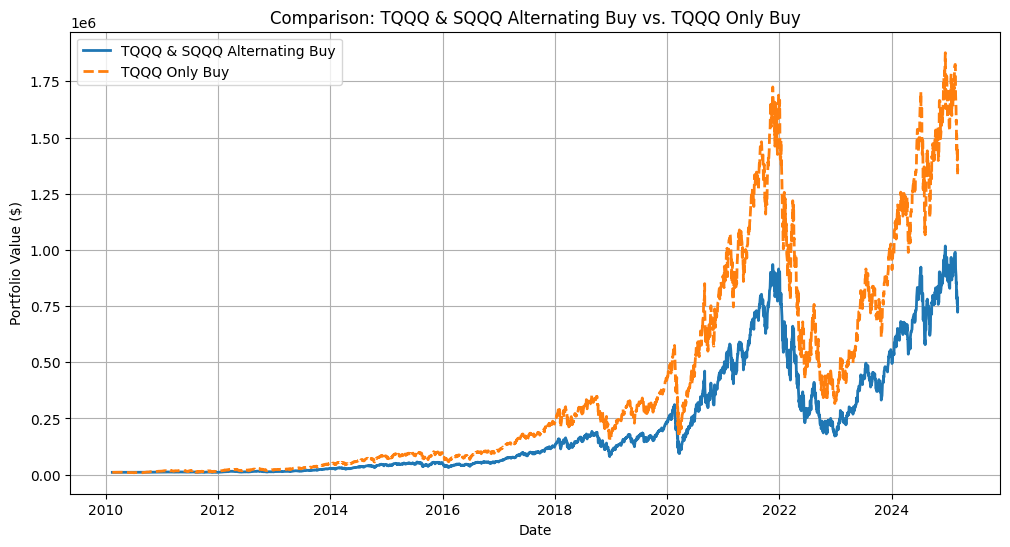

Investment records saved to investment_records.csv
Investment Records DataFrame:
                        Strategy Asset  Amount Invested
Date                                                   
2010-02-12             TQQQ Only  TQQQ              100
2010-02-16             TQQQ Only  TQQQ              100
2010-02-17             TQQQ Only  TQQQ              100
2010-02-18             TQQQ Only  TQQQ              100
2010-02-24             TQQQ Only  TQQQ              100
2010-02-26             TQQQ Only  TQQQ              100
2010-03-01             TQQQ Only  TQQQ              100
2010-03-02             TQQQ Only  TQQQ              100
2010-03-03             TQQQ Only  TQQQ              100
2010-03-04             TQQQ Only  TQQQ              100
2010-03-05             TQQQ Only  TQQQ              100
2010-03-08             TQQQ Only  TQQQ              100
2010-03-09             TQQQ Only  TQQQ              100
2010-03-10             TQQQ Only  TQQQ              100
2010-03-11             

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import os

# 데이터 다운로드
start_date = "2000-01-01"
end_date = "2025-03-10"
tickers = ["TQQQ", "SQQQ", "QQQ"]
data = yf.download(tickers, start=start_date, end=end_date)

# 'Adj Close'가 없을 경우 'Close' 사용
if "Adj Close" in data.columns:
    data = data["Adj Close"]
else:
    data = data["Close"]

data = data.rename(columns={"TQQQ": "TQQQ Price", "SQQQ": "SQQQ Price", "QQQ": "QQQ Price"})

# 200일 이동평균선 계산
data["200DMA"] = data["QQQ Price"].rolling(window=200, min_periods=200).mean()
data.dropna(inplace=True)  # NaN 제거

# 투자 전략 실행
initial_cash = 10000
cash_both = initial_cash
cash_tqqq_only = initial_cash
tqqq_shares_both = 0
sqqq_shares_both = 0
tqqq_shares_tqqq_only = 0
in_bear_market = False  # 초기에는 False로 설정

portfolio_values_both = []
portfolio_values_tqqq_only = []
investment_records = []

for i in range(1, len(data)):
    current_price = data["QQQ Price"].iloc[i]
    prev_price = data["QQQ Price"].iloc[i - 1]
    moving_avg = data["200DMA"].iloc[i]

    # 200일 이동평균선 아래로 내려가면 약세장 시작
    if current_price < moving_avg:
        in_bear_market = True

    # 200일 이동평균선 위로 올라오면 종료
    elif current_price > moving_avg:
        in_bear_market = False

    if in_bear_market:
        if current_price > prev_price:
            # 주가 상승 → SQQQ 매수 ($100)
            if cash_both >= 100:
                cash_both -= 100
                sqqq_shares_both += 100 / data["SQQQ Price"].iloc[i]
                investment_records.append((data.index[i], "Alternative Strategy", "SQQQ", 100))
        elif current_price < prev_price:
            # 주가 하락 → TQQQ 매수 ($100)
            if cash_both >= 100:
                cash_both -= 100
                tqqq_shares_both += 100 / data["TQQQ Price"].iloc[i]
                investment_records.append((data.index[i], "Alternative Strategy", "TQQQ", 100))

    # TQQQ Only 전략: 주가 상승일에만 매수
    if current_price > prev_price:
        if cash_tqqq_only >= 100:
            cash_tqqq_only -= 100
            tqqq_shares_tqqq_only += 100 / data["TQQQ Price"].iloc[i]
            investment_records.append((data.index[i], "TQQQ Only", "TQQQ", 100))

    # 포트폴리오 평가
    tqqq_value_both = tqqq_shares_both * data["TQQQ Price"].iloc[i]
    sqqq_value_both = sqqq_shares_both * data["SQQQ Price"].iloc[i]
    total_value_both = cash_both + tqqq_value_both + sqqq_value_both
    portfolio_values_both.append((data.index[i], total_value_both))

    tqqq_value_tqqq_only = tqqq_shares_tqqq_only * data["TQQQ Price"].iloc[i]
    total_value_tqqq_only = cash_tqqq_only + tqqq_value_tqqq_only
    portfolio_values_tqqq_only.append((data.index[i], total_value_tqqq_only))

# DataFrame 변환
portfolio_df_both = pd.DataFrame(portfolio_values_both, columns=["Date", "Portfolio Value (Both)"])
portfolio_df_both.set_index("Date", inplace=True)

portfolio_df_tqqq_only = pd.DataFrame(portfolio_values_tqqq_only, columns=["Date", "Portfolio Value (TQQQ Only)"])
portfolio_df_tqqq_only.set_index("Date", inplace=True)

investment_df = pd.DataFrame(investment_records, columns=["Date", "Strategy", "Asset", "Amount Invested"])
investment_df.set_index("Date", inplace=True)

# 포트폴리오 비교 시각화
plt.figure(figsize=(12,6))
plt.plot(portfolio_df_both.index, portfolio_df_both["Portfolio Value (Both)"], label="TQQQ & SQQQ Alternating Buy", linewidth=2)
plt.plot(portfolio_df_tqqq_only.index, portfolio_df_tqqq_only["Portfolio Value (TQQQ Only)"], label="TQQQ Only Buy", linestyle="--", linewidth=2)
plt.title("Comparison: TQQQ & SQQQ Alternating Buy vs. TQQQ Only Buy")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid()
plt.show()

# 투자 기록 저장 및 출력
investment_df.to_csv("investment_records.csv")
print("Investment records saved to investment_records.csv")
print("Investment Records DataFrame:")
print(investment_df.to_string())

# 총 투자 금액 계산 및 표시
total_investment_summary = investment_df.groupby(["Strategy", "Asset"])['Amount Invested'].sum().reset_index()
print("Total Investment Summary:")
print(total_investment_summary.to_string())

# CSV 파일 확인
print("File exists:", os.path.exists("investment_records.csv"))


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import os

# 데이터 다운로드
start_date = "2000-01-01"
end_date = "2025-03-10"
tickers = ["TQQQ", "SQQQ", "QQQ"]
data = yf.download(tickers, start=start_date, end=end_date)

# 'Adj Close'가 없을 경우 'Close' 사용
if "Adj Close" in data.columns:
    data = data["Adj Close"]
else:
    data = data["Close"]

data = data.rename(columns={"TQQQ": "TQQQ Price", "SQQQ": "SQQQ Price", "QQQ": "QQQ Price"})

# 200일 이동평균선 계산
data["200DMA"] = data["QQQ Price"].rolling(window=200, min_periods=200).mean()
data.dropna(inplace=True)  # NaN 제거

# 투자 전략 실행
initial_cash = 10000
cash_both = initial_cash
cash_tqqq_only = initial_cash
tqqq_shares_both = 0
sqqq_shares_both = 0
tqqq_shares_tqqq_only = 0
in_bear_market = False  # 초기에는 False로 설정

portfolio_values_both = []
portfolio_values_tqqq_only = []
investment_records = []

for i in range(1, len(data)):
    current_price = data["QQQ Price"].iloc[i]
    prev_price = data["QQQ Price"].iloc[i - 1]
    moving_avg = data["200DMA"].iloc[i]

    # 200일 이동평균선 아래로 내려가면 약세장 시작
    if current_price < moving_avg:
        in_bear_market = True

    # 200일 이동평균선 위로 올라오면 종료
    elif current_price > moving_avg:
        in_bear_market = False

    if in_bear_market:
        if current_price > prev_price:
            # 주가 상승 → SQQQ 매수 ($100)
            if cash_both >= 100:
                cash_both -= 100
                sqqq_shares_both += 100 / data["SQQQ Price"].iloc[i]
                investment_records.append((data.index[i], "Alternative Strategy", "SQQQ", 100))
        elif current_price < prev_price:
            # 주가 하락 → TQQQ 매수 ($100)
            if cash_both >= 100:
                cash_both -= 100
                tqqq_shares_both += 100 / data["TQQQ Price"].iloc[i]
                investment_records.append((data.index[i], "Alternative Strategy", "TQQQ", 100))

    # TQQQ Only 전략: 주가 상승일에만 매수
    if current_price > prev_price:
        if cash_tqqq_only >= 100:
            cash_tqqq_only -= 100
            tqqq_shares_tqqq_only += 100 / data["TQQQ Price"].iloc[i]
            investment_records.append((data.index[i], "TQQQ Only", "TQQQ", 100))

    # 포트폴리오 평가
    tqqq_value_both = tqqq_shares_both * data["TQQQ Price"].iloc[i]
    sqqq_value_both = sqqq_shares_both * data["SQQQ Price"].iloc[i]
    total_value_both = cash_both + tqqq_value_both + sqqq_value_both
    portfolio_values_both.append((data.index[i], total_value_both))

    tqqq_value_tqqq_only = tqqq_shares_tqqq_only * data["TQQQ Price"].iloc[i]
    total_value_tqqq_only = cash_tqqq_only + tqqq_value_tqqq_only
    portfolio_values_tqqq_only.append((data.index[i], total_value_tqqq_only))

# DataFrame 변환
portfolio_df_both = pd.DataFrame(portfolio_values_both, columns=["Date", "Portfolio Value (Both)"])
portfolio_df_both.set_index("Date", inplace=True)

portfolio_df_tqqq_only = pd.DataFrame(portfolio_values_tqqq_only, columns=["Date", "Portfolio Value (TQQQ Only)"])
portfolio_df_tqqq_only.set_index("Date", inplace=True)

investment_df = pd.DataFrame(investment_records, columns=["Date", "Strategy", "Asset", "Amount Invested"])
investment_df.set_index("Date", inplace=True)

# 데이터가 2011년 이후에도 존재하는지 확인
print("Latest available data:")
print(data.tail(10))

# 2011년 이후 200일 이동평균선 아래로 내려간 적이 있는지 확인
bear_market_periods = data[data["QQQ Price"] < data["200DMA"]]
print("Bear Market periods after 2011:")
print(bear_market_periods["200DMA"].loc["2012-01-01":].tail(10))

# 포트폴리오 내역이 2011년 이후에도 업데이트되었는지 확인
print("Latest portfolio values (Both strategies):")
print(portfolio_df_both.tail(10))
print(portfolio_df_tqqq_only.tail(10))

# 투자 기록 저장 및 출력
investment_df.to_csv("investment_records.csv")
print("Investment records saved to investment_records.csv")
print("Investment Records DataFrame:")
print(investment_df.to_string())

# 총 투자 금액 계산 및 표시
total_investment_summary = investment_df.groupby(["Strategy", "Asset"])['Amount Invested'].sum().reset_index()
print("Total Investment Summary:")
print(total_investment_summary.to_string())

# CSV 파일 확인
print("File exists:", os.path.exists("investment_records.csv"))


[*********************100%***********************]  3 of 3 completed


Latest available data:
Ticker       QQQ Price  SQQQ Price  TQQQ Price      200DMA
Date                                                      
2025-02-24  519.869995   29.469999   80.699997  489.293483
2025-02-25  513.320007   30.590000   77.620003  489.668595
2025-02-26  514.559998   30.389999   78.120003  490.051201
2025-02-27  500.269989   32.919998   71.639999  490.357579
2025-02-28  508.170013   31.400000   74.919998  490.698281
2025-03-03  497.049988   33.430000   70.080002  490.978307
2025-03-04  495.549988   33.810001   69.309998  491.236648
2025-03-05  502.010010   32.509998   72.010002  491.492599
2025-03-06  488.200012   35.169998   66.040001  491.684079
2025-03-07  491.790009   34.470001   67.410004  491.894604
Bear Market periods after 2011:
Date
2023-01-18    290.024862
2023-01-19    289.607756
2023-01-20    289.191268
2023-01-23    288.846012
2023-01-24    288.536309
2023-01-25    288.219325
2023-01-30    287.511689
2023-03-10    285.639615
2025-03-06    491.684079
2025-03